# Problem Statement

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. We need to predict whether the insurance claim is fraudulent or not.

Dataset - https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

# Importing Base Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

# Exploring Dataset

In [3]:
df.shape

(1000, 40)

Observation- There are 40 unique features and 1000 entries under this dataset

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Observation - We can see 'fraud_reported' is our Target column in this datadset which has 'Y or N' values we have to predict if the fraud is reported or not, hence it is a binary classification problem.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Observation - features are a mix of categorical and numerical data, _c39 column is having all null values

# Determining Unecessary Columns

In [6]:
# Checking the number of unique values in each column
df.nunique().to_frame("No of Unique Values")

No of Unique Values
months_as_customer                           391
age                                           46
policy_number                               1000
policy_bind_date                             951
policy_state                                   3
policy_csl                                     3
policy_deductable                              3
policy_annual_premium                        991
umbrella_limit                                11
insured_zip                                  995
insured_sex                                    2
insured_education_level                        7
insured_occupation                            14
insured_hobbies                               20
insured_relationship                           6
capital-gains                                338
capital-loss                                 354
incident_date                                 60
incident_type                                  4
collision_type                                 4
incident_severity                              4
authorities_contacted                          5
incident_state                                 7
incident_city                                  7
incident_location                           1000
incident_hour_of_the_day                      24
number_of_vehicles_involved                    4
property_damage                                3
bodily_injuries                                3
witnesses                                      4
police_report_available                        3
total_claim_amount                           763
injury_claim                                 638
property_claim                               626
vehicle_claim                                726
auto_make                                     14
auto_model                                    39
auto_year                                     21
fraud_reported                                 2
_c39                                           0

Observation - 

1) policy_number have 1000 unique entries, which don't have any relation to target 

2) incident_location also have 1000 unique values, which is of no use

3) insured_zip have 995 unique values, we can drop this column

4) _c39 column is empty

we can drop all these columns

In [7]:
# Dropping unnecessary columns
df = df.drop(['policy_number','incident_location','insured_zip','_c39'], axis = 1)

In [8]:
df.shape

(1000, 36)

# Null Value Analysis

In [9]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

Observation - there is no missing data in the dataset

# Zero Value Analysis

In [10]:
(df==0).sum()

months_as_customer               1
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                 798
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                  508
capital-loss                   475
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day        52
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries                340
witnesses                      249
police_report_available          0
total_claim_amount  

Columns umbrella_limit,capital-gains and capital-loss contains more zero values around 79.8%,50.8% and 47.5% respectively. Since Umbrella_limit column has more than 70% of zero values so we can drop it

In [11]:
# Dropping umbrella_limit column
df.drop("umbrella_limit",axis=1,inplace=True)

In [12]:
df.shape

(1000, 35)

# Calculating Policy Age by calculating difference of days between Incident date and Policy Bind date

In [13]:
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [14]:
policy_age = []
policy_bind_day = []
policy_bind_month = []
policy_bind_year = []
incident_day = []
incident_month = []
incident_year = []

# Extracting Day, Month and Year column from policy_bind_date
policy_bind_day = df['policy_bind_date'].dt.day
policy_bind_month = df['policy_bind_date'].dt.month
policy_bind_year = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
incident_day = df['incident_date'].dt.day
incident_month = df['incident_date'].dt.month
incident_year = df['incident_date'].dt.year

#find number of days between two given dates
from datetime import date
 
def numOfDays(date1, date2):
    return (date2-date1).days
     
# Driver program
for i in range (0,df.shape[0]):
    date1 = date(policy_bind_year[i], policy_bind_month[i], policy_bind_day[i])
    date2 = date(incident_year[i], incident_month[i], incident_day[i])
    policy_age.append(numOfDays(date1, date2))
    
df['policy_age'] = policy_age


In [15]:
df.head()

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       2014-10-17           OH    250/500   
1                 228   42       2006-06-27           IN    250/500   
2                 134   29       2000-06-09           OH    100/300   
3                 256   41       1990-05-25           IL    250/500   
4                 228   44       2014-06-06           IL   500/1000   

   policy_deductable  policy_annual_premium insured_sex  \
0               1000                1406.91        MALE   
1               2000                1197.22        MALE   
2               2000                1413.14      FEMALE   
3               2000                1415.74      FEMALE   
4               1000                1583.91        MALE   

  insured_education_level insured_occupation  ... police_report_available  \
0                      MD       craft-repair  ...                     YES   
1                      MD  machine-op-inspct  ...                       ?   
2                     PhD              sales  ...                      NO   
3                     PhD       armed-forces  ...                      NO   
4               Associate              sales  ...                      NO   

  total_claim_amount  injury_claim  property_claim vehicle_claim  auto_make  \
0              71610          6510           13020         52080       Saab   
1               5070           780             780          3510   Mercedes   
2              34650          7700            3850         23100      Dodge   
3              63400          6340            6340         50720  Chevrolet   
4               6500          1300             650          4550     Accura   

  auto_model auto_year fraud_reported policy_age  
0        92x      2004              Y        100  
1       E400      2007              Y       3130  
2        RAM      2007              N       5371  
3      Tahoe      2014              Y       9260  
4        RSX      2009              N        256  

[5 rows x 36 columns]

In [16]:
#drop policy_bind_date and incident_date as we have calculated policy_age now
df = df.drop(['policy_bind_date','incident_date'], axis = 1)

In [17]:
df.shape

(1000, 34)

In [18]:
df.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium insured_sex insured_education_level  \
0                1406.91        MALE                      MD   
1                1197.22        MALE                      MD   
2                1413.14      FEMALE                     PhD   
3                1415.74      FEMALE                     PhD   
4                1583.91        MALE               Associate   

  insured_occupation insured_hobbies  ... police_report_available  \
0       craft-repair        sleeping  ...                     YES   
1  machine-op-inspct         reading  ...                       ?   
2              sales     board-games  ...                      NO   
3       armed-forces     board-games  ...                      NO   
4              sales     board-games  ...                      NO   

   total_claim_amount  injury_claim property_claim vehicle_claim  auto_make  \
0               71610          6510          13020         52080       Saab   
1                5070           780            780          3510   Mercedes   
2               34650          7700           3850         23100      Dodge   
3               63400          6340           6340         50720  Chevrolet   
4                6500          1300            650          4550     Accura   

  auto_model auto_year fraud_reported  policy_age  
0        92x      2004              Y         100  
1       E400      2007              Y        3130  
2        RAM      2007              N        5371  
3      Tahoe      2014              Y        9260  
4        RSX      2009              N         256  

[5 rows x 34 columns]

# '?' Value Analysis

In [20]:
#observing the dataset, it was found that few of the columns have ? as a value, we need to check and impute that data
(df=='?').sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim       

In [21]:
#treating ? in collision_type
df["collision_type"] = df["collision_type"].replace("?",np.nan) #replacing " " with nan
df["collision_type"] = df["collision_type"].fillna(df["collision_type"].mode()) #replacing nan with mode
df.loc[df["collision_type"]=="?"]

Empty DataFrame
Columns: [months_as_customer, age, policy_state, policy_csl, policy_deductable, policy_annual_premium, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported, policy_age]
Index: []

[0 rows x 34 columns]

In [22]:
#treating ? in property_damage
df["property_damage"] = df["property_damage"].replace("?",np.nan) #replacing " " with nan
df["property_damage"] = df["property_damage"].fillna(df["property_damage"].mode()) #replacing nan with mode
df.loc[df["property_damage"]=="?"]

Empty DataFrame
Columns: [months_as_customer, age, policy_state, policy_csl, policy_deductable, policy_annual_premium, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported, policy_age]
Index: []

[0 rows x 34 columns]

In [23]:
#treating ? in police_report_available
df["police_report_available"] = df["police_report_available"].replace("?",np.nan) #replacing " " with nan
df["police_report_available"] = df["police_report_available"].fillna(df["police_report_available"].mode()) #replacing nan with mode
df.loc[df["police_report_available"]=="?"]

Empty DataFrame
Columns: [months_as_customer, age, policy_state, policy_csl, policy_deductable, policy_annual_premium, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported, policy_age]
Index: []

[0 rows x 34 columns]

In [24]:
(df=='?').sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model

# Drop Duplicate Data

In [25]:
#lets drop the duplicate rows if any
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

Observation - there was no duplicate data

# Discriptive Analysis

In [26]:
df.describe(include='all')

months_as_customer          age policy_state policy_csl  \
count          1000.000000  1000.000000         1000       1000   
unique                 NaN          NaN            3          3   
top                    NaN          NaN           OH    250/500   
freq                   NaN          NaN          352        351   
mean            203.954000    38.948000          NaN        NaN   
std             115.113174     9.140287          NaN        NaN   
min               0.000000    19.000000          NaN        NaN   
25%             115.750000    32.000000          NaN        NaN   
50%             199.500000    38.000000          NaN        NaN   
75%             276.250000    44.000000          NaN        NaN   
max             479.000000    64.000000          NaN        NaN   

        policy_deductable  policy_annual_premium insured_sex  \
count         1000.000000            1000.000000        1000   
unique                NaN                    NaN           2   
top                   NaN                    NaN      FEMALE   
freq                  NaN                    NaN         537   
mean          1136.000000            1256.406150         NaN   
std            611.864673             244.167395         NaN   
min            500.000000             433.330000         NaN   
25%            500.000000            1089.607500         NaN   
50%           1000.000000            1257.200000         NaN   
75%           2000.000000            1415.695000         NaN   
max           2000.000000            2047.590000         NaN   

       insured_education_level insured_occupation insured_hobbies  ...  \
count                     1000               1000            1000  ...   
unique                       7                 14              20  ...   
top                         JD  machine-op-inspct         reading  ...   
freq                       161                 93              64  ...   
mean                       NaN                NaN             NaN  ...   
std                        NaN                NaN             NaN  ...   
min                        NaN                NaN             NaN  ...   
25%                        NaN                NaN             NaN  ...   
50%                        NaN                NaN             NaN  ...   
75%                        NaN                NaN             NaN  ...   
max                        NaN                NaN             NaN  ...   

       police_report_available  total_claim_amount  injury_claim  \
count                      657          1000.00000   1000.000000   
unique                       2                 NaN           NaN   
top                         NO                 NaN           NaN   
freq                       343                 NaN           NaN   
mean                       NaN         52761.94000   7433.420000   
std                        NaN         26401.53319   4880.951853   
min                        NaN           100.00000      0.000000   
25%                        NaN         41812.50000   4295.000000   
50%                        NaN         58055.00000   6775.000000   
75%                        NaN         70592.50000  11305.000000   
max                        NaN        114920.00000  21450.000000   

       property_claim vehicle_claim auto_make auto_model    auto_year  \
count     1000.000000   1000.000000      1000       1000  1000.000000   
unique            NaN           NaN        14         39          NaN   
top               NaN           NaN      Saab        RAM          NaN   
freq              NaN           NaN        80         43          NaN   
mean      7399.570000  37928.950000       NaN        NaN  2005.103000   
std       4824.726179  18886.252893       NaN        NaN     6.015861   
min          0.000000     70.000000       NaN        NaN  1995.000000   
25%       4445.000000  30292.500000       NaN        NaN  2000.000000   
50%       6750.000000  42100.000000       NaN        NaN  2005.000000  

# Interpreting Relationship between Features and Target Variable

In [27]:
# Checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("\n")

# Checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)
print("\n")

Categorical columns are:
 ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical columns are:
 ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_age']




# Analysing Target Variable

In [28]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [29]:
df['fraud_reported'].nunique()

2

In [30]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

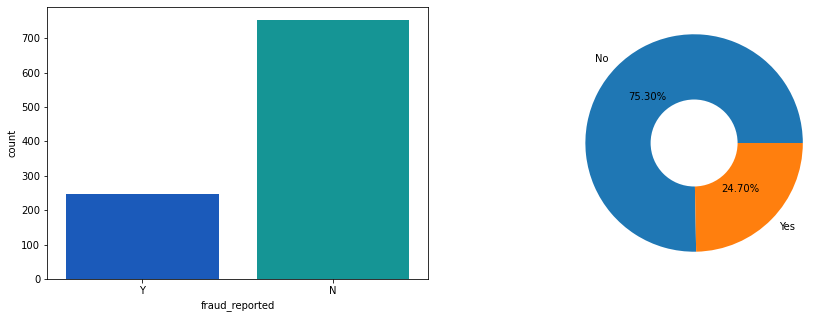

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(df['fraud_reported'], palette ='winter')

plt.subplot(1,2,2)
labels = 'No','Yes'
plt.pie(df['fraud_reported'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - In 75% cases, no fraud is reported

# Analysing Categorical Feature Variables

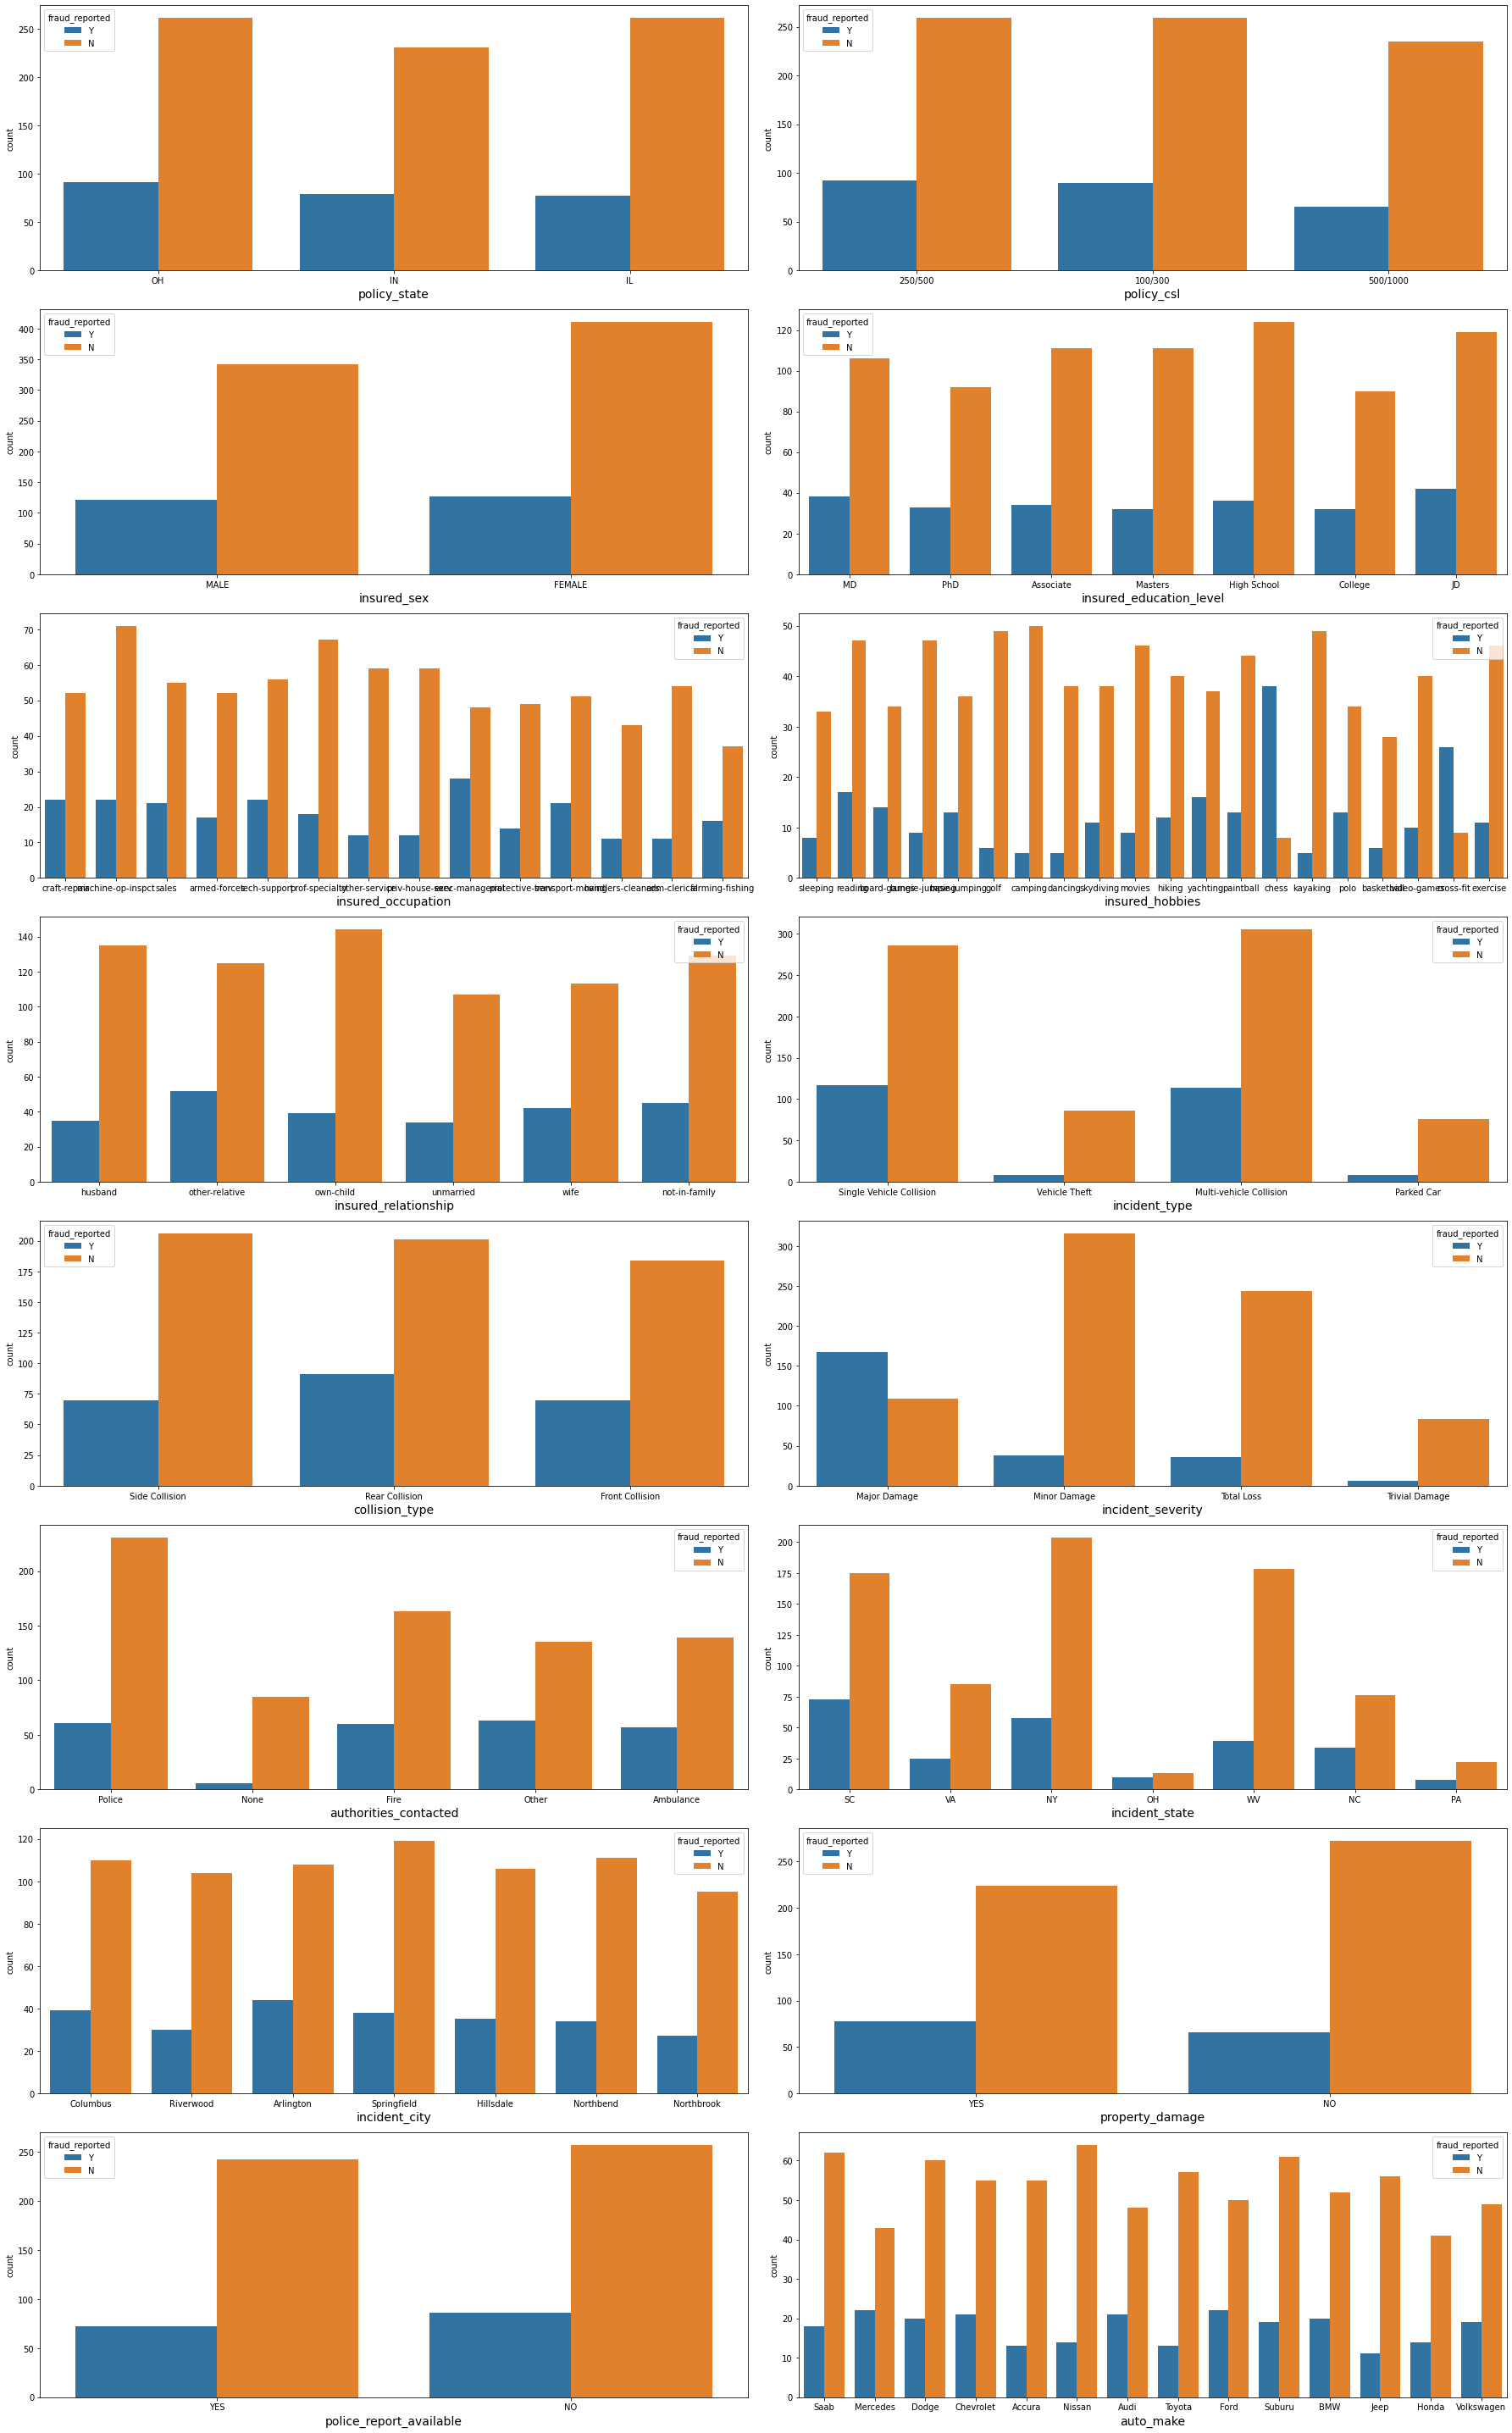

In [43]:
plt.figure(figsize=(25,40),facecolor='white')
plotnum=1
for col in categorical_col:
    if plotnum<=16:
        plt.subplot(8,2,plotnum)
        sns.countplot(df[col], hue = df['fraud_reported'])
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.tight_layout()

# Analysing Numerical Feature Variables

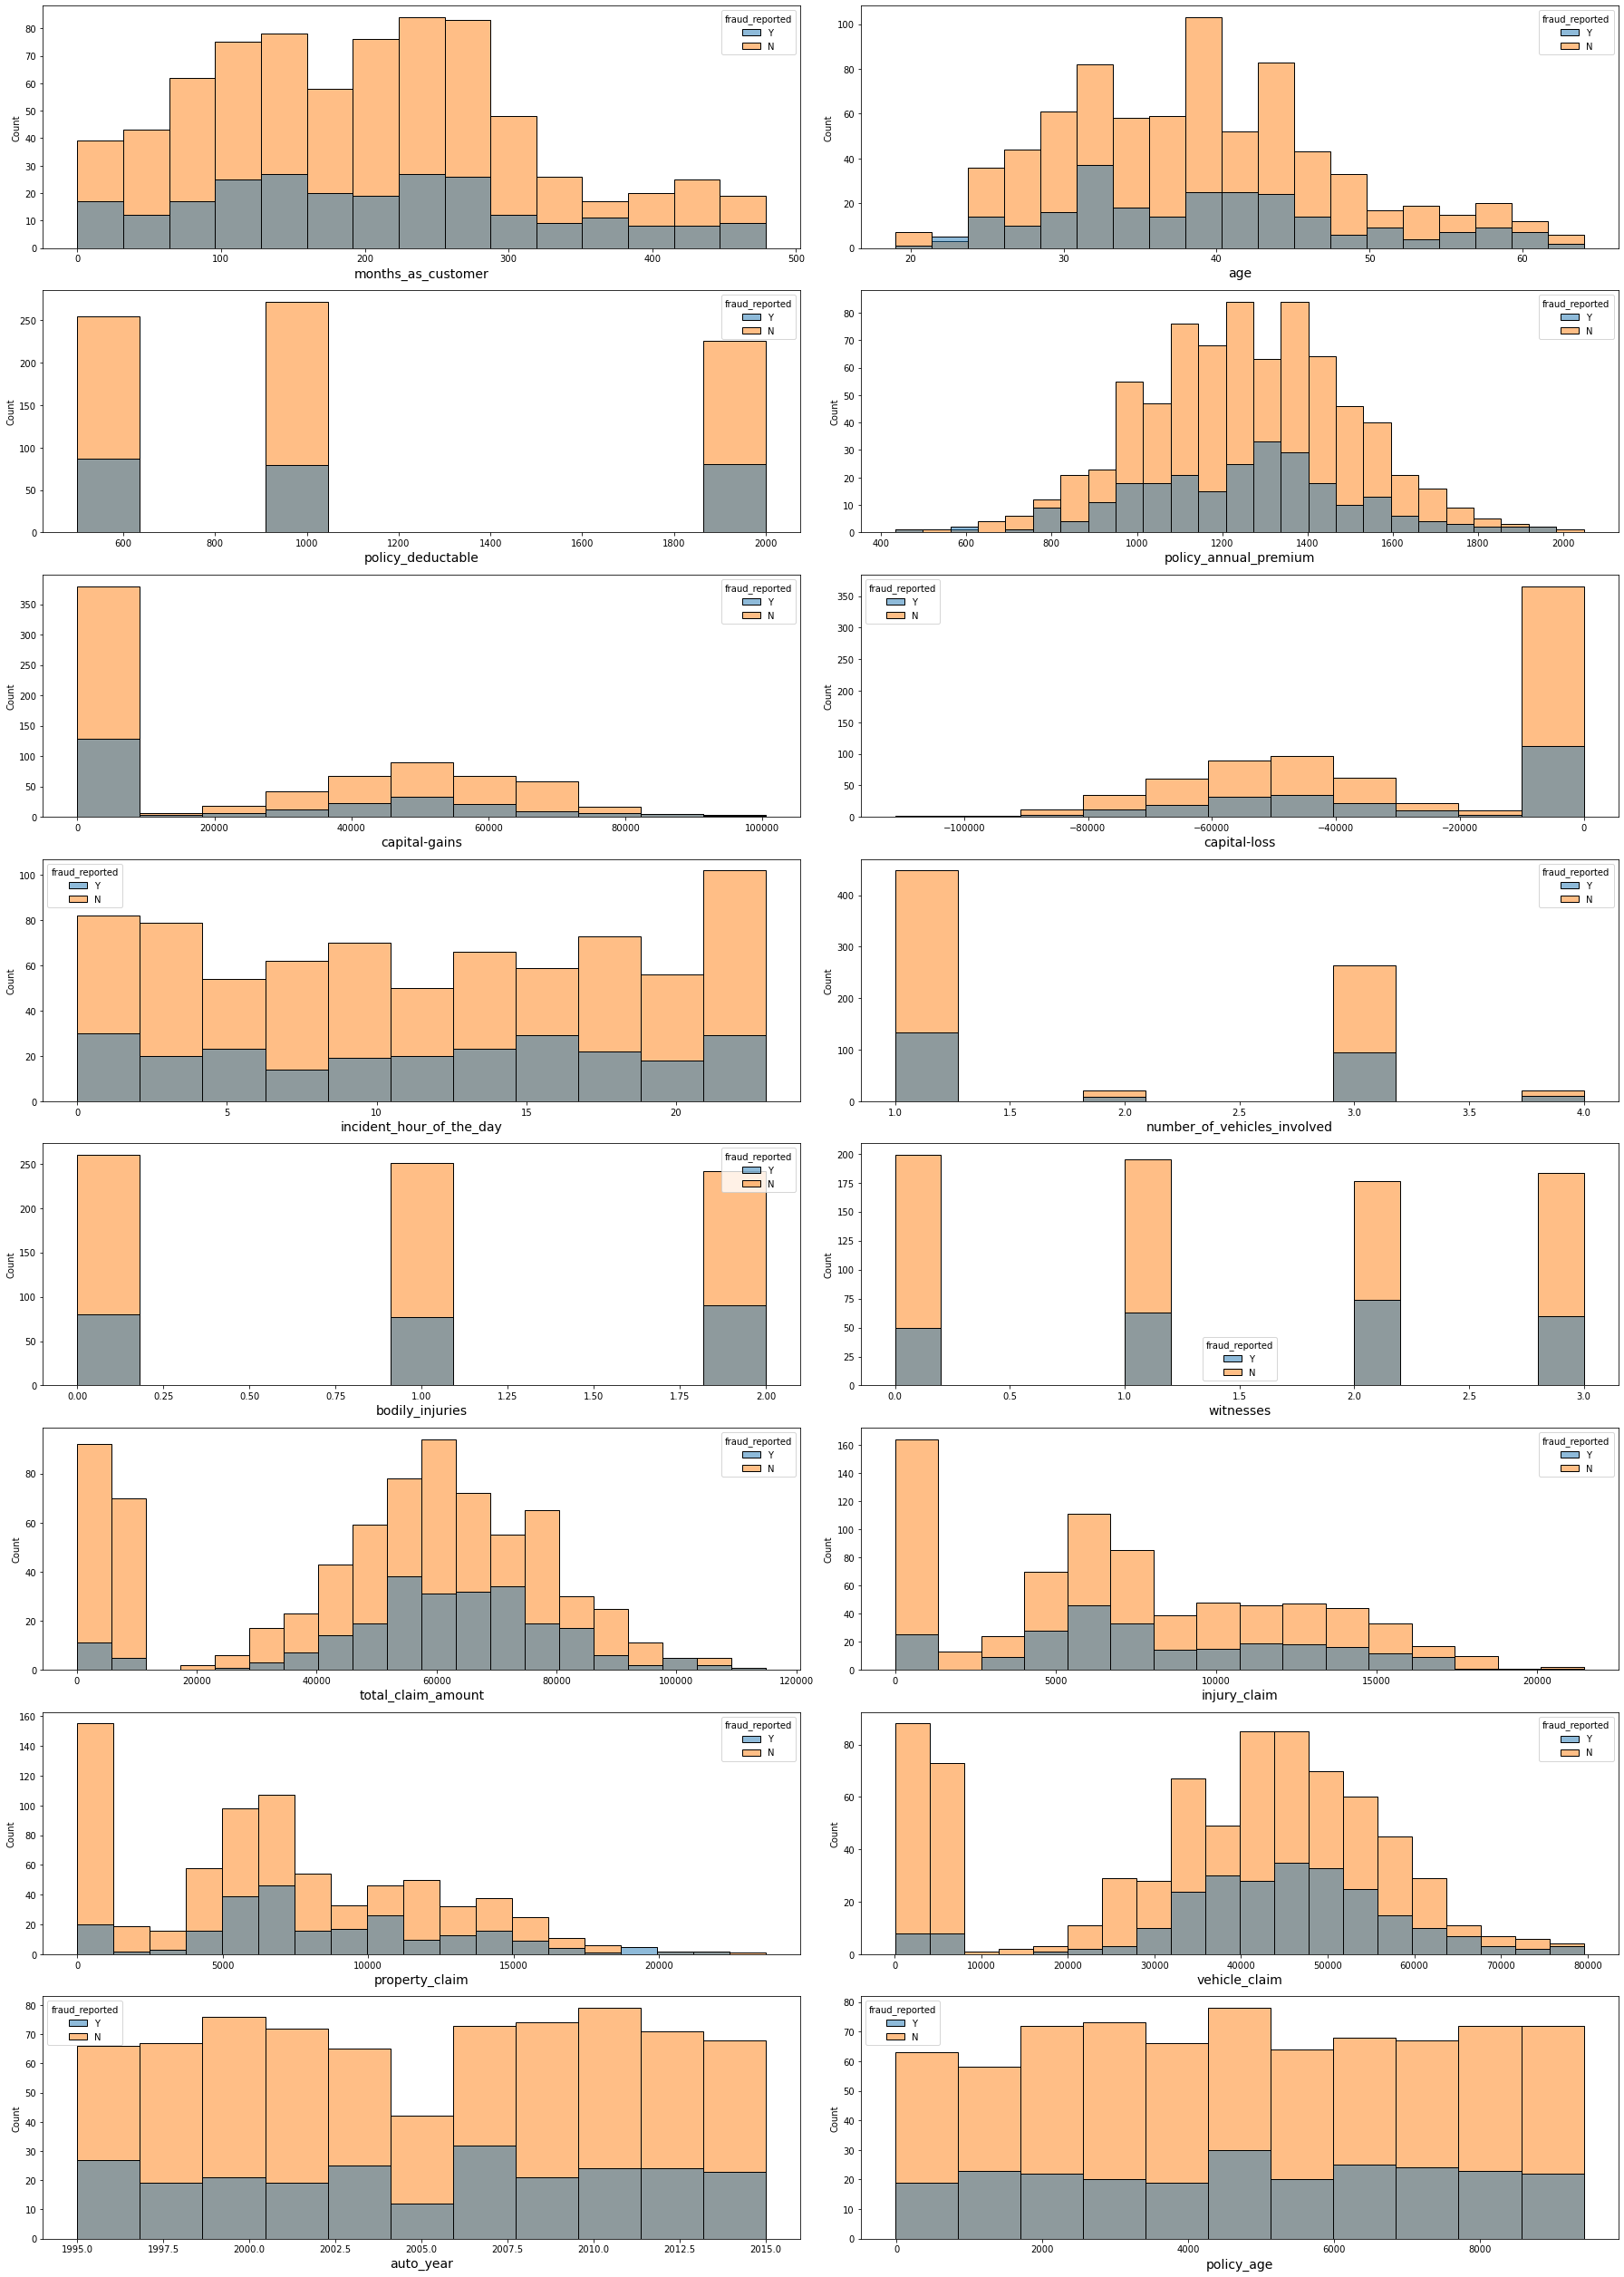

In [50]:
plt.figure(figsize=(25,35),facecolor='white')
plotnum=1
for col in numerical_col:
    if plotnum<=16:
        plt.subplot(8,2,plotnum)
        sns.histplot(x=col, hue='fraud_reported', data = df)
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.tight_layout()

# Visualizing all data together

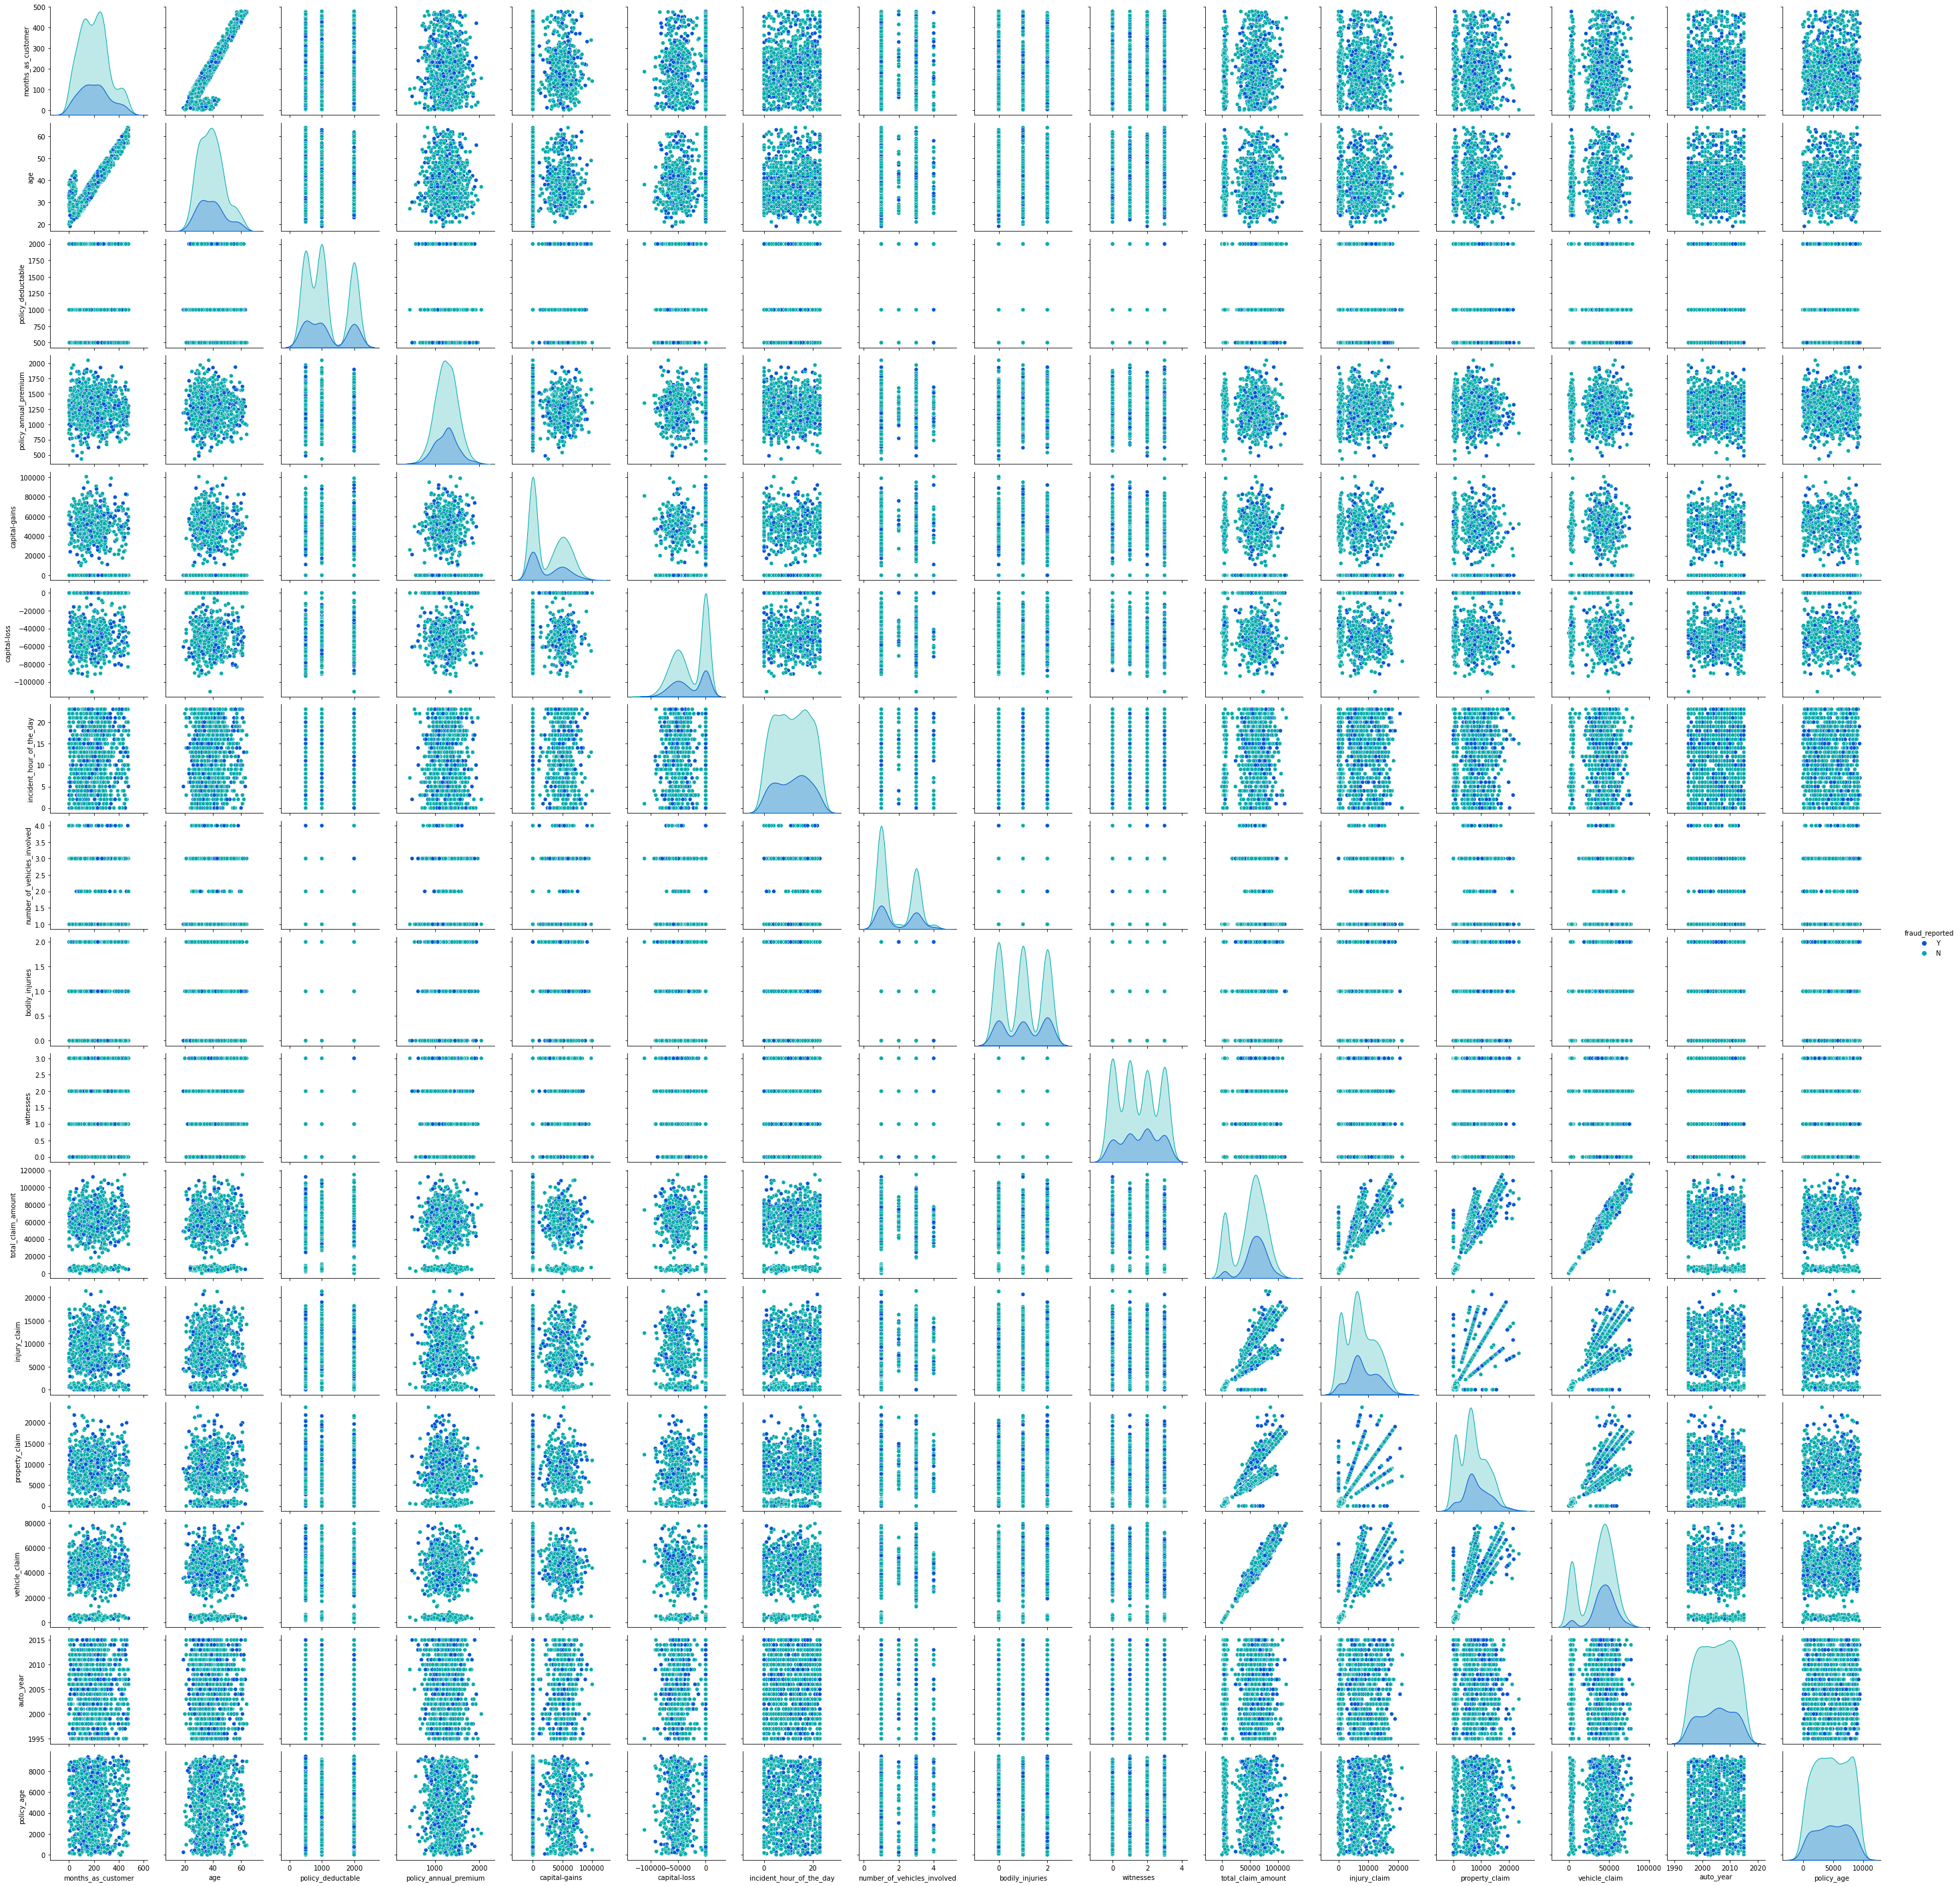

In [51]:
sns.pairplot(df, palette = 'winter', hue='fraud_reported')

# Label Encoding

In [52]:
#we need to convert categorical columns into numerical ones before proceeding further
label_encoder = preprocessing.LabelEncoder()

#encoding feature columns
df['policy_state']=label_encoder.fit_transform(df['policy_state'])

df['policy_csl']=label_encoder.fit_transform(df['policy_csl'])

df['insured_sex']=label_encoder.fit_transform(df['insured_sex'])

df['insured_education_level']=label_encoder.fit_transform(df['insured_education_level'])

df['insured_occupation']=label_encoder.fit_transform(df['insured_occupation'])

df['insured_hobbies']=label_encoder.fit_transform(df['insured_hobbies'])

df['insured_relationship']=label_encoder.fit_transform(df['insured_relationship'])

df['incident_type']=label_encoder.fit_transform(df['incident_type'])

df['collision_type']=label_encoder.fit_transform(df['collision_type'])

df['incident_severity']=label_encoder.fit_transform(df['incident_severity'])

df['authorities_contacted']=label_encoder.fit_transform(df['authorities_contacted'])

df['incident_state']=label_encoder.fit_transform(df['incident_state'])

df['incident_city']=label_encoder.fit_transform(df['incident_city'])

df['property_damage']=label_encoder.fit_transform(df['property_damage'])

df['police_report_available']=label_encoder.fit_transform(df['police_report_available'])

df['auto_make']=label_encoder.fit_transform(df['auto_make'])

df['auto_model']=label_encoder.fit_transform(df['auto_model'])

#encoding target columns
df['fraud_reported']=label_encoder.fit_transform(df['fraud_reported'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   insured_sex                  1000 non-null   int32  
 7   insured_education_level      1000 non-null   int32  
 8   insured_occupation           1000 non-null   int32  
 9   insured_hobbies              1000 non-null   int32  
 10  insured_relationship         1000 non-null   int32  
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

Observation - All categorical columns have been converted

# Correlation

In [54]:
#lets find out the correlation between the columns
df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922098     -0.000328   
age                                    0.922098  1.000000     -0.014533   
policy_state                          -0.000328 -0.014533      1.000000   
policy_csl                            -0.026819 -0.015185      0.001027   
policy_deductable                      0.026807  0.029188      0.010033   
policy_annual_premium                  0.005018  0.014404      0.012455   
insured_sex                            0.060925  0.073337     -0.020481   
insured_education_level               -0.000833  0.000969     -0.034327   
insured_occupation                     0.009814  0.017220     -0.031215   
insured_hobbies                       -0.093661 -0.081315     -0.038689   
insured_relationship                   0.069727  0.074832     -0.018506   
capital-gains                          0.006399 -0.007075      0.074551   
capital-loss                           0.020209  0.007368     -0.030338   
incident_type                         -0.017377 -0.025626      0.031848   
collision_type                        -0.082966 -0.086068      0.037564   
incident_severity                     -0.059581 -0.058439     -0.026377   
authorities_contacted                  0.010021  0.015417     -0.016777   
incident_state                         0.005369  0.005770      0.008723   
incident_city                         -0.000130 -0.002291     -0.002077   
incident_hour_of_the_day               0.070639  0.087161      0.029457   
number_of_vehicles_involved            0.014736  0.022102     -0.042263   
property_damage                       -0.004631 -0.002733     -0.030719   
bodily_injuries                       -0.010162 -0.015679      0.013384   
witnesses                              0.058383  0.052359      0.022960   
police_report_available               -0.071746 -0.063040     -0.024713   
total_claim_amount                     0.062108  0.069863     -0.006002   
injury_claim                           0.065329  0.075522     -0.046290   
property_claim                         0.034940  0.060898      0.008406   
vehicle_claim                          0.061013  0.062588      0.001425   
auto_make                              0.047655  0.030410      0.017124   
auto_model                             0.004202  0.017343     -0.025253   
auto_year                             -0.000292  0.001354      0.002114   
fraud_reported                         0.020544  0.012143      0.029432   
policy_age                             0.048603  0.037404      0.005445   

                             policy_csl  policy_deductable  \
months_as_customer            -0.026819           0.026807   
age                           -0.015185           0.029188   
policy_state                   0.001027           0.010033   
policy_csl                     1.000000           0.003384   
policy_deductable              0.003384           1.000000   
policy_annual_premium          0.023978          -0.003245   
insured_sex                   -0.010757          -0.009733   
insured_education_level        0.009153           0.015217   
insured_occupation             0.015788          -0.046733   
insured_hobbies               -0.005960           0.004061   
insured_relationship          -0.030063          -0.022945   
capital-gains                  0.005249           0.035212   
capital-loss                  -0.034612          -0.023544   
incident_type                  0.011997          -0.038411   
collision_type                 0.065861          -0.041188   
incident_severity              0.022530          -0.015711   
authorities_contacted          0.056182          -0.000760   
incident_state                 0.032814           0.006517   
incident_city                  0.009333          -0.045117   
incident_hour_of_the_day      -0.001869           0.060935   
number_of_vehicles_involved   -0.019403           0.051214   
property_damage                0.007561

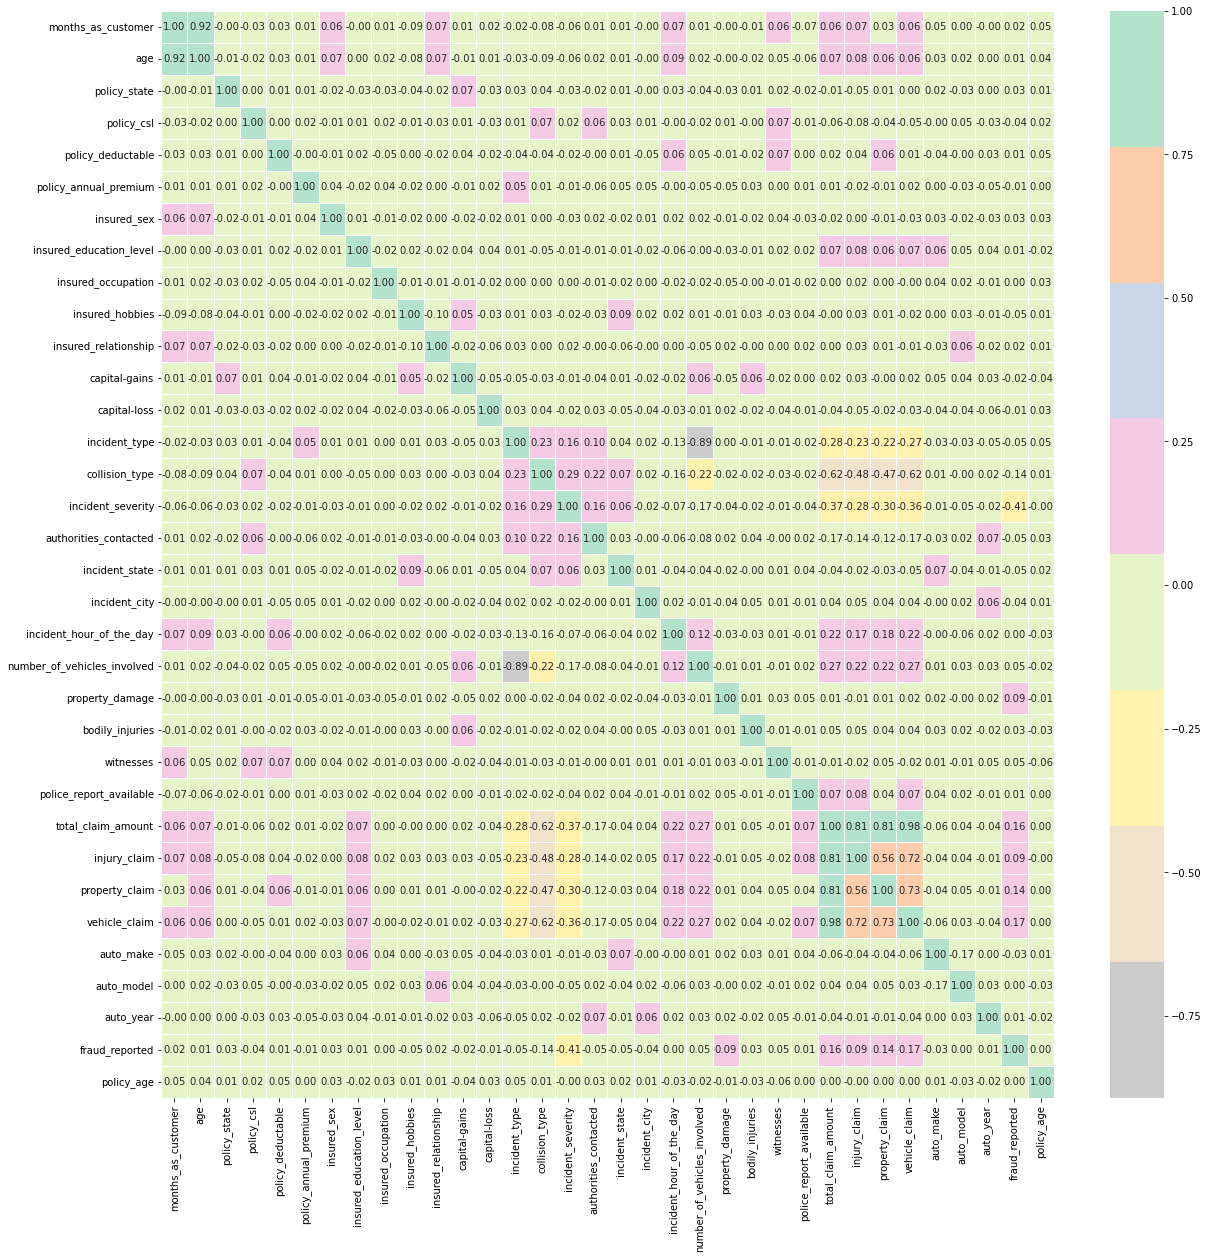

In [55]:
#lets plot the correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=1,cmap='Pastel2_r')
plt.show()

Observation - 
- age and months_as_customer are strongly correlated 92%
- property_claim and vehicle_claim are 73% correlated
- injury_claim and property_claim are 56% correlated
- total_claim_amount and injury_claim are 81% correlated

In [56]:
#lets find out the correlation of Feature variables with target variable 
df.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
collision_type                -0.135725
incident_state                -0.051407
incident_type                 -0.050376
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
auto_make                     -0.027519
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
auto_model                     0.000720
policy_age                     0.001406
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
police_report_available        0.008399
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
months_as_customer             0.020544
insured_relationship           0.021043
policy_state                   0.029432
insured_sex                    0.030873


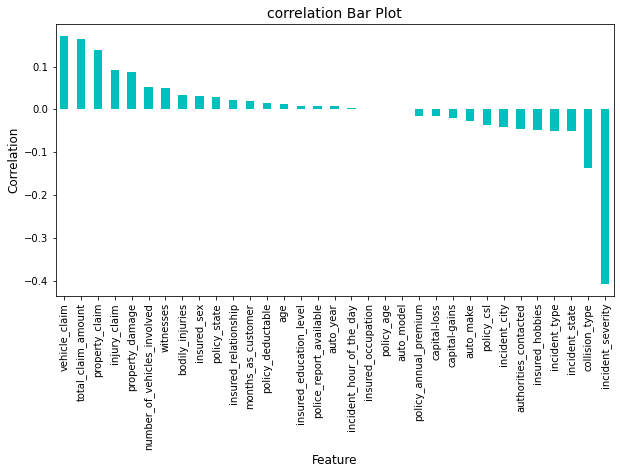

In [57]:
#Plotting the correlation
plt.figure(figsize=(10,5))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar' ,color='c')
plt.xlabel('Feature' ,fontsize=12)
plt.ylabel('Correlation',fontsize=12)
plt.title('correlation Bar Plot',fontsize=14)
plt.show()

# Detecting Multicollinearity with VIF and Data Cleaning

Observed using heatmap that some of the feature variable have good correaltion which causes multicollinearity. lets test that using VIF score

In [58]:
#separating the Features and Target Variable
x = df.drop(columns = ['fraud_reported'])
y = df['fraud_reported']

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()

vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

                        feature         VIF
0            months_as_customer   28.367019
1                           age  131.113390
2                  policy_state    2.560505
3                    policy_csl    2.459570
4             policy_deductable    4.607494
5         policy_annual_premium   28.240162
6                   insured_sex    1.906655
7       insured_education_level    3.428960
8            insured_occupation    3.804466
9               insured_hobbies    4.130473
10         insured_relationship    3.183513
11                capital-gains    1.877391
12                 capital-loss    1.972673
13                incident_type   11.053891
14               collision_type    4.678681
15            incident_severity    3.103512
16        authorities_contacted    3.268870
17               incident_state    3.383450
18                incident_city    3.167066
19     incident_hour_of_the_day    4.150143
20  number_of_vehicles_involved   21.592751
21              property_damage 

VIF values ranging between 1 and 10 are moderate. They represent a medium level of collinearity. Values of more than 10 are highly collinear.

Observation-

As VIF score for age and auto_year is quite high and these column doesn't have strong bond with Target so Lets drop that columns and check VIF again

In [60]:
# VIF dataframe
vif_data1 = pd.DataFrame()

x.drop(['age'],axis=1, inplace=True)
x.drop(['auto_year'],axis=1, inplace=True)

vif_data1["feature"] = x.columns
vif_data1["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data1)

                        feature        VIF
0            months_as_customer   4.261095
1                  policy_state   2.520485
2                    policy_csl   2.446031
3             policy_deductable   4.505364
4         policy_annual_premium  22.774223
5                   insured_sex   1.901029
6       insured_education_level   3.376657
7            insured_occupation   3.709001
8               insured_hobbies   4.043277
9          insured_relationship   3.114463
10                capital-gains   1.871709
11                 capital-loss   1.964914
12                incident_type   8.007814
13               collision_type   4.400508
14            incident_severity   2.982333
15        authorities_contacted   3.235946
16               incident_state   3.360061
17                incident_city   3.147647
18     incident_hour_of_the_day   4.052934
19  number_of_vehicles_involved  15.172255
20              property_damage   2.479580
21              bodily_injuries   2.499498
22         

removing total claim amount

In [61]:
# VIF dataframe
vif_data2 = pd.DataFrame()

x.drop(['total_claim_amount'],axis=1, inplace=True)

vif_data2["feature"] = x.columns
vif_data2["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data2)

                        feature        VIF
0            months_as_customer   4.261095
1                  policy_state   2.520485
2                    policy_csl   2.446031
3             policy_deductable   4.505364
4         policy_annual_premium  22.774223
5                   insured_sex   1.901029
6       insured_education_level   3.376657
7            insured_occupation   3.709001
8               insured_hobbies   4.043277
9          insured_relationship   3.114463
10                capital-gains   1.871709
11                 capital-loss   1.964914
12                incident_type   8.007814
13               collision_type   4.400508
14            incident_severity   2.982333
15        authorities_contacted   3.235946
16               incident_state   3.360061
17                incident_city   3.147647
18     incident_hour_of_the_day   4.052934
19  number_of_vehicles_involved  15.172255
20              property_damage   2.479580
21              bodily_injuries   2.499498
22         

Observation - VIF is under moderate range now lets select best Features using K best Features Method

In [62]:
df = df.drop(['age','auto_year','total_claim_amount'], axis = 1)
df.shape

(1000, 31)

# Feature Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variables. The scikit-learn library provides the SelectKBest with f_classif() class that can be used with a suite of different statistical tests to select a specific number of features.

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature = SelectKBest(score_func=f_classif, k=8)
fit = best_feature.fit(x, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe column

featureScores.sort_values(by=['Score'], ascending=False)

Specs       Score
14            incident_severity  196.960603
26                vehicle_claim   29.718214
25               property_claim   19.327729
13               collision_type   18.729474
24                 injury_claim    8.328776
20              property_damage    7.724530
19  number_of_vehicles_involved    2.689100
16               incident_state    2.644427
12                incident_type    2.539153
22                    witnesses    2.451026
8               insured_hobbies    2.194239
15        authorities_contacted    2.098018
17                incident_city    1.631761
2                    policy_csl    1.382236
21              bodily_injuries    1.146656
5                   insured_sex    0.952144
1                  policy_state    0.865237
27                    auto_make    0.756354
9          insured_relationship    0.442135
0            months_as_customer    0.421370
10                capital-gains    0.366990
11                 capital-loss    0.220519
3             policy_deductable    0.219163
4         policy_annual_premium    0.209284
6       insured_education_level    0.077435
23      police_report_available    0.070402
18     incident_hour_of_the_day    0.018590
7            insured_occupation    0.002440
29                   policy_age    0.001974
28                   auto_model    0.000517

Observation - insured_occupation, policy_age, auto_model are least significant and least correlated to the target, hence dropping these columns too

In [64]:
df = df.drop(['insured_occupation','policy_age','auto_model'], axis = 1)
df.shape

(1000, 28)

# Skewness

In [65]:
df.skew()

months_as_customer             0.362177
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_sex                    0.148630
insured_education_level       -0.000148
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.041341
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.000000
injury_claim                   0.264811
property_claim                 0.378169


Observation-

The acceptable skewness range is +/- 0.5, only target variable, vehicle_claim have skewness involved.

# Distribution Curve

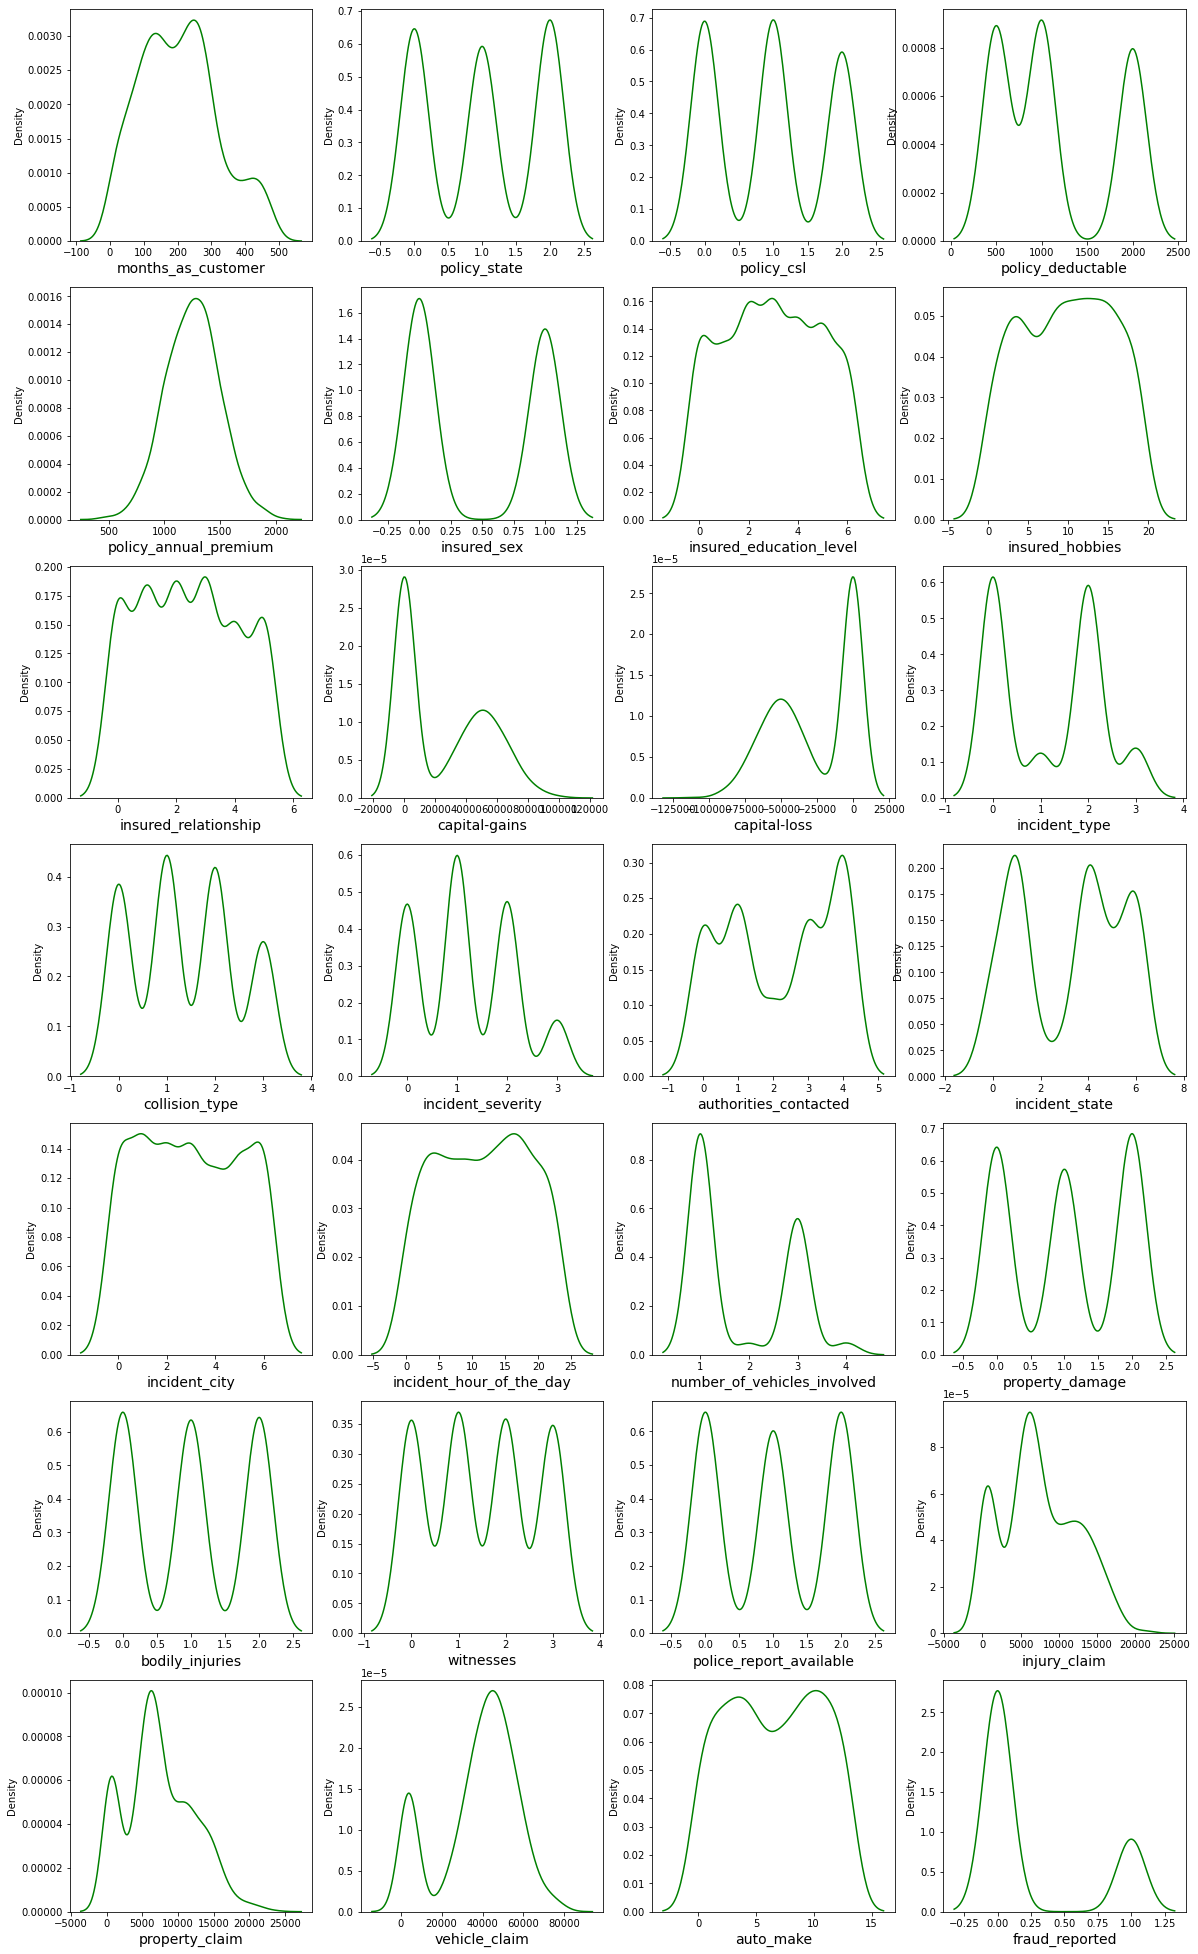

In [66]:
plt.figure(figsize=(20,35),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=28:
        plt.subplot(7,4,plotnum)
        sns.kdeplot(df[col], color = 'g')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

# Checking Outliers

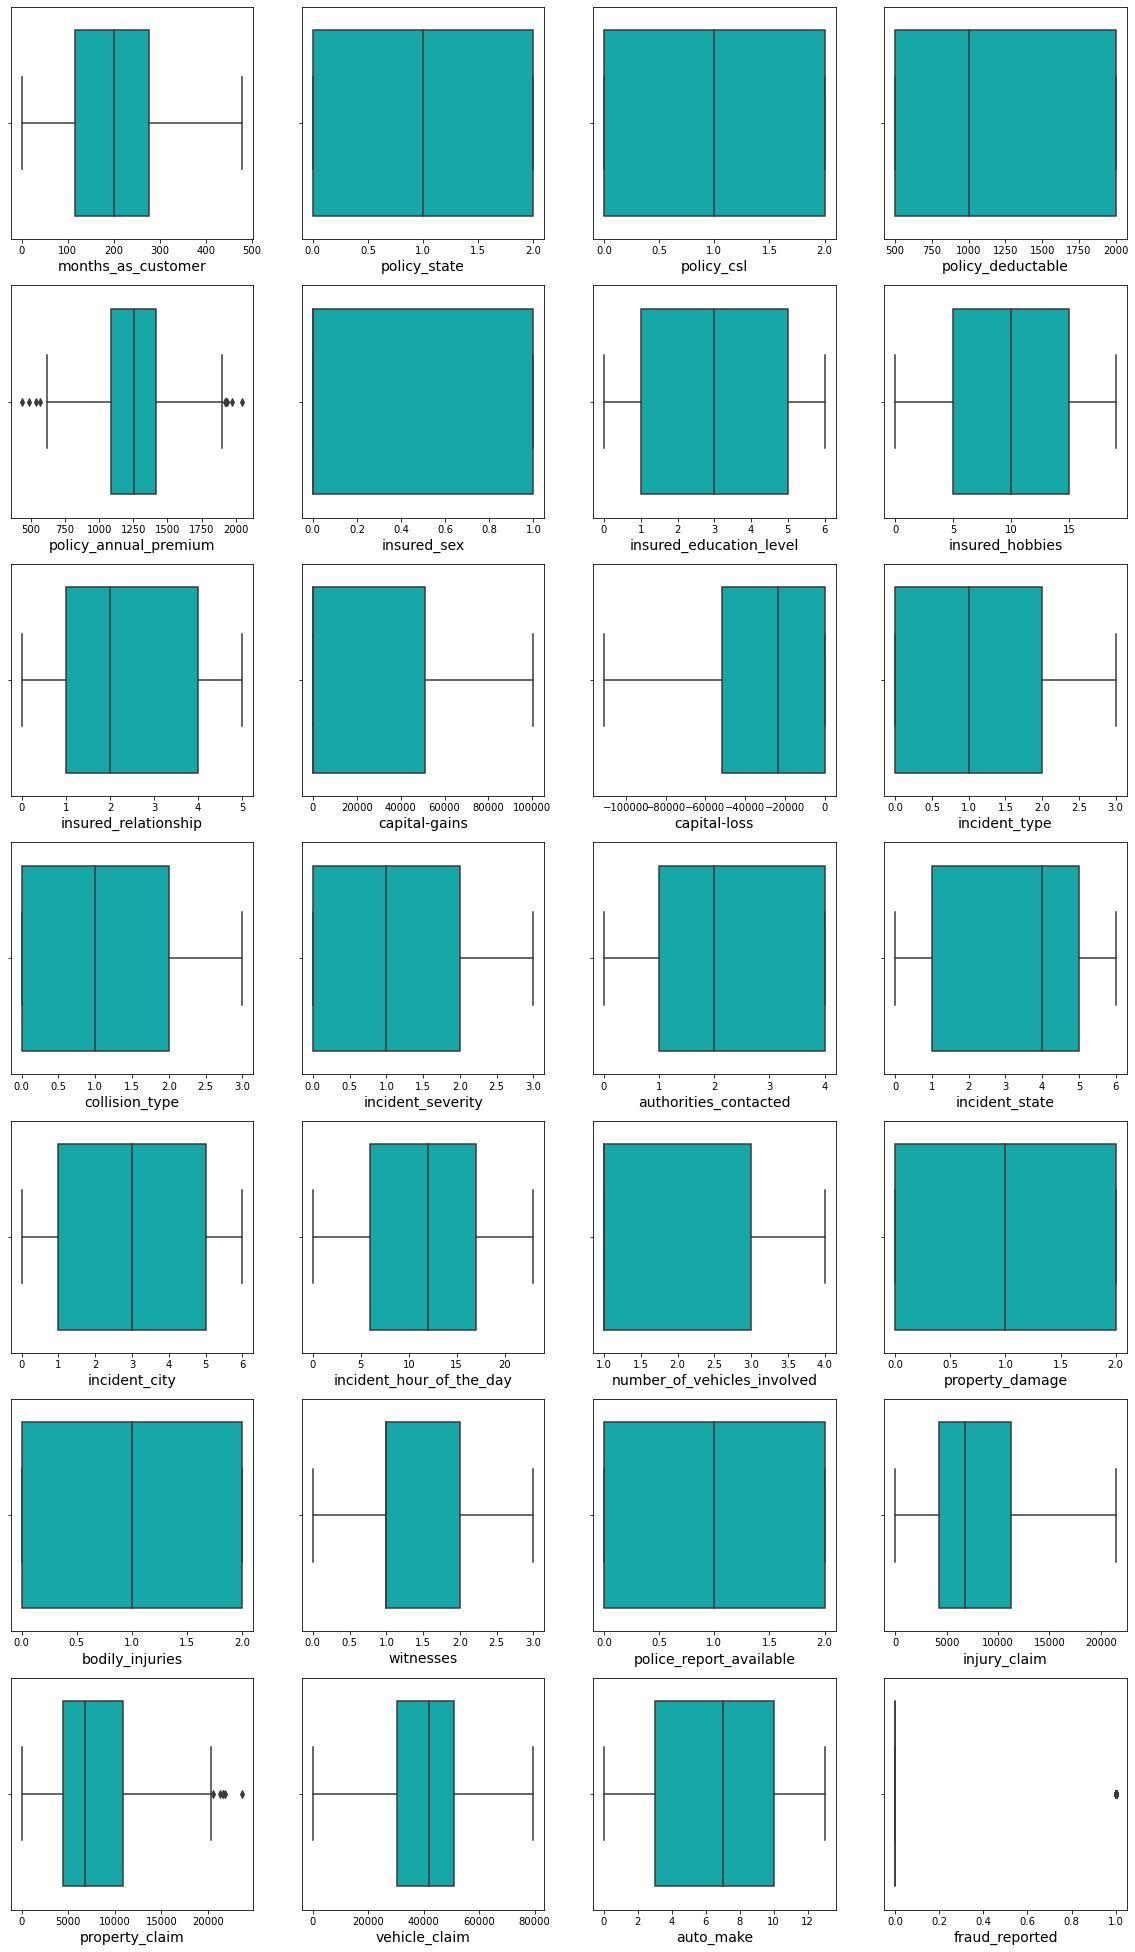

In [67]:
plt.figure(figsize=(20,35),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=28:
        plt.subplot(7,4,plotnum)
        sns.boxplot(df[col], color='c')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - as expected some of the feature variables and target variable have outliers. lets treat them with the help of z score method

# Removing Outliers

In [68]:
#using z-score method
from scipy.stats import zscore #import zscore from scipy library
zscore(df)

months_as_customer  policy_state  policy_csl  policy_deductable  \
0              1.078140      1.187173    0.060937          -0.222383   
1              0.208995     -0.016856    0.060937           1.412784   
2             -0.608002      1.187173   -1.182668           1.412784   
3              0.452355     -1.220886    0.060937           1.412784   
4              0.208995     -1.220886    1.304542          -0.222383   
..                  ...           ...         ...                ...   
995           -1.746582      1.187173    1.304542          -0.222383   
996            0.704407     -1.220886   -1.182668          -0.222383   
997           -0.642767      1.187173    0.060937          -1.039966   
998            2.208028     -1.220886    1.304542           1.412784   
999            2.190645      1.187173    0.060937          -0.222383   

     policy_annual_premium  insured_sex  insured_education_level  \
0                 0.616705     1.076953                 0.530931   
1                -0.242521     1.076953                 0.530931   
2                 0.642233    -0.928546                 1.557877   
3                 0.652886    -0.928546                 1.557877   
4                 1.341980     1.076953                -1.522961   
..                     ...          ...                      ...   
995               0.222884    -0.928546                 1.044404   
996               0.739141    -0.928546                 1.557877   
997               0.520739    -0.928546                 1.044404   
998               0.411866     1.076953                -1.522961   
999              -2.008710    -0.928546                -1.522961   

     insured_hobbies  insured_relationship  capital-gains  ...  \
0           1.281737             -1.437957       1.011331  ...   
1           0.929078             -0.247595      -0.901927  ...   
2          -1.363201              0.347586       0.358023  ...   
3          -1.363201              0.942766       0.853388  ...   
4          -1.363201              0.942766       1.467210  ...   
..               ...                   ...            ...  ...   
995         0.576420              0.942766      -0.901927  ...   
996         1.281737              1.537947       1.643100  ...   
997        -1.186872             -0.247595       0.358023  ...   
998        -1.715859              1.537947      -0.901927  ...   
999         0.223762             -1.437957      -0.901927  ...   

     number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
0                      -0.823865        -0.026342         0.009759   0.461838   
1                      -0.823865         1.171013        -1.210174  -1.338700   
2                       1.140056        -1.223697         1.229693   1.362107   
3                      -0.823865         1.171013         0.009759   0.461838   
4                      -0.823865        -1.223697        -1.210174  -0.438431   
..                           ...              ...              ...        ...   
995                    -0.823865        -0.026342        -1.210174  -0.438431   
996                    -0.823865        -0.026342         1.229693   1.362107   
997                     1.140056         1.171013         1.229693   1.362107   
998                    -0.823865         1.171013        -1.210174  -0.438431   
999                    -0.823865         1.171013        -1.210174   1.362107   

     police_report_available  injury_claim  property_claim  vehicle_claim  \
0                   0.000000     -0.189283        1.165505       0.749653   
1                   1.207363     -1.363822       -1.372696      -1.823346   
2                  -1.207363      0.054644       -0.736072      -0.785565   
3                  -1.207363     -0.224130       -0.219722       0.677607   
4                  -1.207363     -1.257232       -1.399654      -1.768252   
..                       ...           ...             ...            ...   
995               

In [69]:
z = np.abs(zscore(df))
z.shape

(1000, 28)

In [70]:
np.where(z>3) #detecting outliers where z>3

(array([229, 248, 500, 763, 807], dtype=int64),
 array([ 4,  4, 24,  4, 10], dtype=int64))

In [71]:
z.iloc[229] #checking one of the detected outliers

months_as_customer             0.434173
policy_state                   1.220886
policy_csl                     0.060937
policy_deductable              0.222383
policy_annual_premium          3.241955
insured_sex                    0.928546
insured_education_level        0.530931
insured_hobbies                0.481555
insured_relationship           0.247595
capital-gains                  0.901927
capital-loss                   1.459816
incident_type                  0.766005
collision_type                 0.360554
incident_severity              0.195906
authorities_contacted          0.543955
incident_state                 0.351762
incident_city                  0.962196
incident_hour_of_the_day       1.388046
number_of_vehicles_involved    0.823865
property_damage                1.171013
bodily_injuries                1.210174
witnesses                      1.362107
police_report_available        1.207363
injury_claim                   1.440312
property_claim                 0.035164


In [72]:
#checking total number of rows where z>3
len(np.where(z>3)[0])

5

In [73]:
#percent loss
percent_loss = 5*100/1000
print("Percent Loss: ",percent_loss)

Percent Loss:  0.5


This is in acceptable range, so removing the entries where z score for any of the feature variable is >3

In [74]:
#removing outliers

df_new = df[(z<3).all(axis=1)]

print("Old Data Frame:",df.shape)
print("New Data Frame:",df_new.shape)
print("Total Dropped Rows:",df.shape[0] - df_new.shape[0])

Old Data Frame: (1000, 28)
New Data Frame: (995, 28)
Total Dropped Rows: 5


In [75]:
df_new.head()

months_as_customer  policy_state  policy_csl  policy_deductable  \
0                 328             2           1               1000   
1                 228             1           1               2000   
2                 134             2           0               2000   
3                 256             0           1               2000   
4                 228             0           2               1000   

   policy_annual_premium  insured_sex  insured_education_level  \
0                1406.91            1                        4   
1                1197.22            1                        4   
2                1413.14            0                        6   
3                1415.74            0                        6   
4                1583.91            1                        0   

   insured_hobbies  insured_relationship  capital-gains  ...  \
0               17                     0          53300  ...   
1               15                     2              0  ...   
2                2                     3          35100  ...   
3                2                     4          48900  ...   
4                2                     4          66000  ...   

   number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
0                            1                1                1          2   
1                            1                2                0          0   
2                            3                0                2          3   
3                            1                2                1          2   
4                            1                0                0          1   

   police_report_available  injury_claim  property_claim  vehicle_claim  \
0                        1          6510           13020          52080   
1                        2           780             780           3510   
2                        0          7700            3850          23100   
3                        0          6340            6340          50720   
4                        0          1300             650           4550   

   auto_make  fraud_reported  
0         10               1  
1          8               1  
2          4               0  
3          3               1  
4          0               0  

[5 rows x 28 columns]

# Checking Outliers again using boxplot

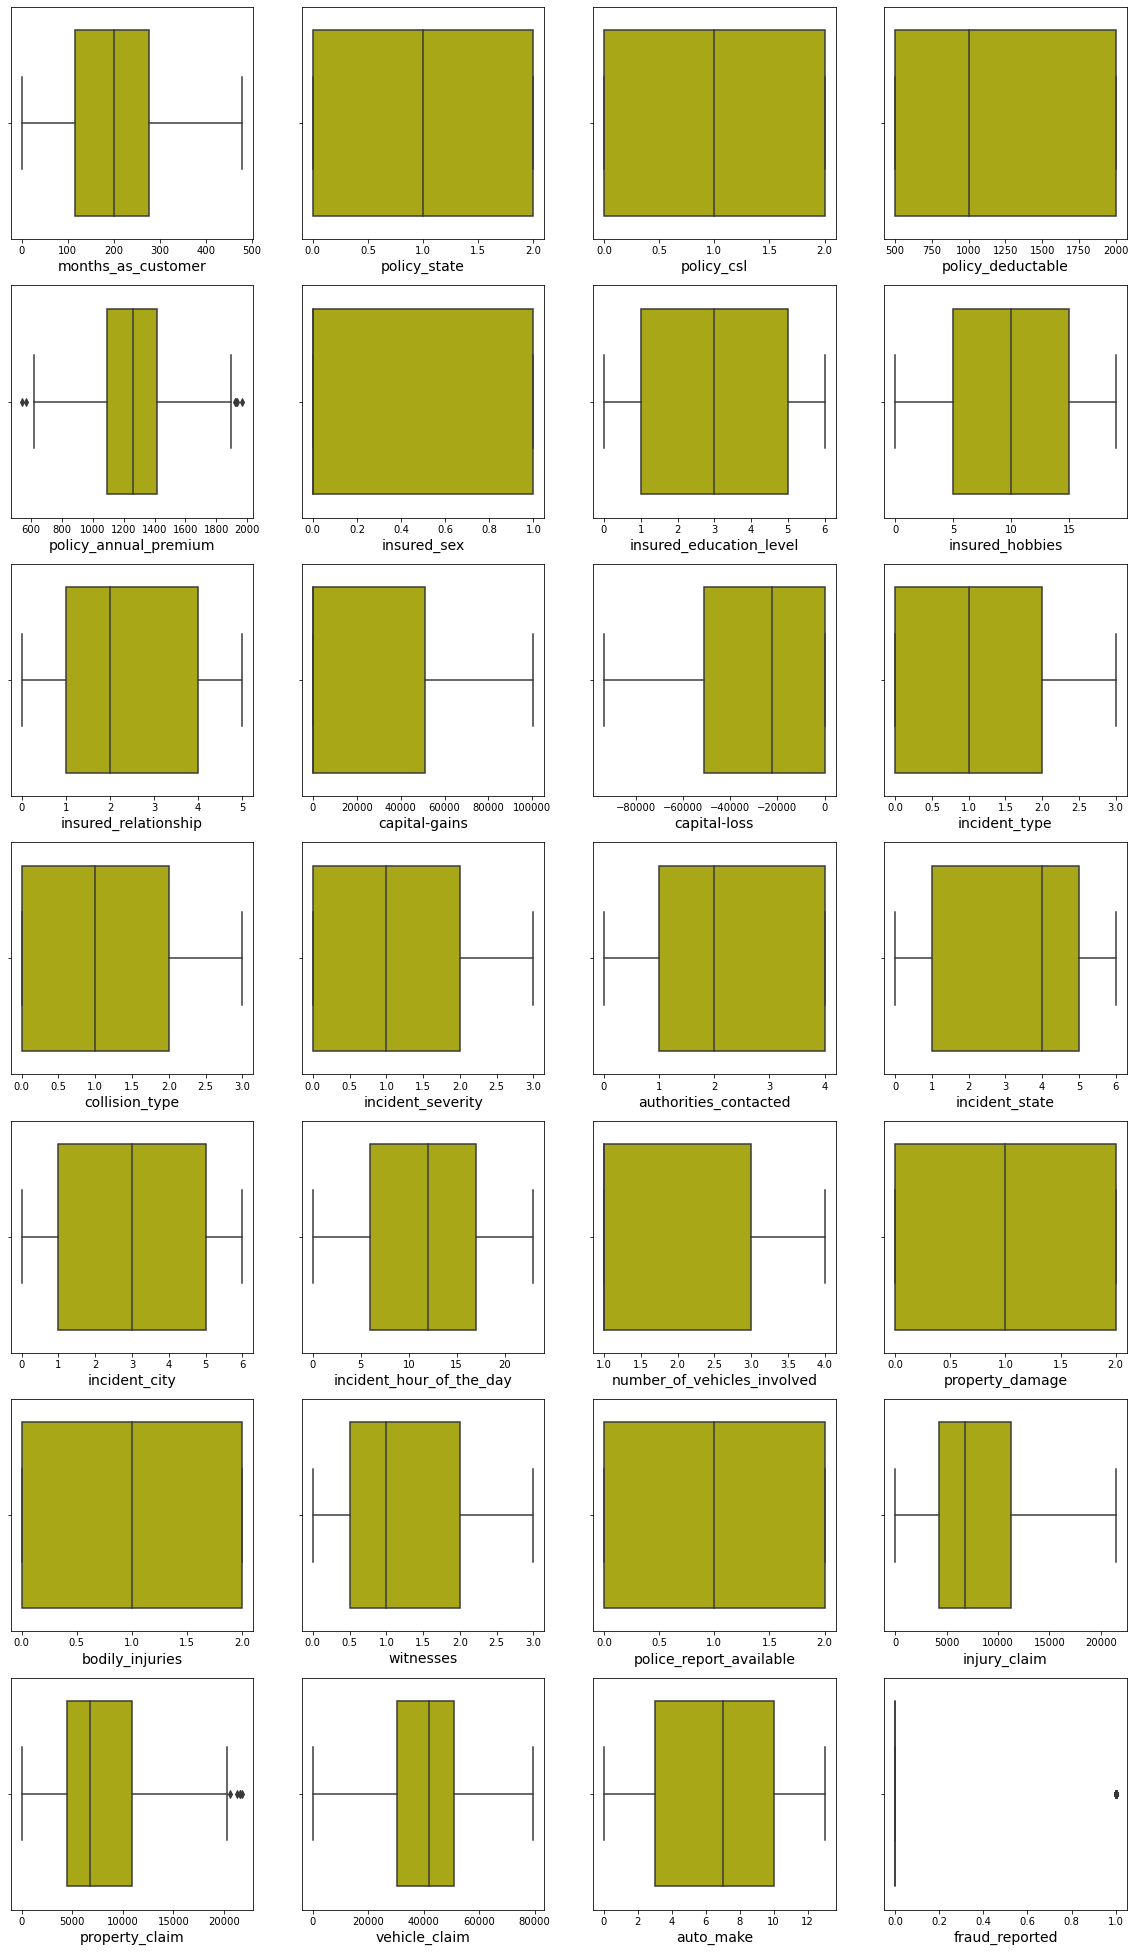

In [76]:
plt.figure(figsize=(20,35),facecolor='white')
plotnum=1
for col in df_new.columns:
    if plotnum<=28:
        plt.subplot(7,4,plotnum)
        sns.boxplot(df_new[col], color='y')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - outliers have been treated to some extent. Lets implement IQR method to treat outliers

# Treating Outliers using IQR method

In [77]:
X = df_new.drop('fraud_reported', axis=1)
Y = df_new['fraud_reported']

In [78]:
#create new dataframe
X_new = pd.DataFrame()

In [79]:
def detect_and_treat_outliers_iqr(data):
    new_list = []
    #data = sorted(data)
    
    median = np.median(data)# calculating median 

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            i = median    #replacing outlier with median as all the variables are of integer type
        new_list.append(i)
    return new_list 


for col in X.columns:
    X_new[col] = detect_and_treat_outliers_iqr(X[col])
    
X_new.head()

months_as_customer  policy_state  policy_csl  policy_deductable  \
0                 328             2           1               1000   
1                 228             1           1               2000   
2                 134             2           0               2000   
3                 256             0           1               2000   
4                 228             0           2               1000   

   policy_annual_premium  insured_sex  insured_education_level  \
0                1406.91            1                        4   
1                1197.22            1                        4   
2                1413.14            0                        6   
3                1415.74            0                        6   
4                1583.91            1                        0   

   insured_hobbies  insured_relationship  capital-gains  ...  \
0               17                     0          53300  ...   
1               15                     2              0  ...   
2                2                     3          35100  ...   
3                2                     4          48900  ...   
4                2                     4          66000  ...   

   incident_hour_of_the_day  number_of_vehicles_involved  property_damage  \
0                         5                            1                1   
1                         8                            1                2   
2                         7                            3                0   
3                         5                            1                2   
4                        20                            1                0   

   bodily_injuries  witnesses  police_report_available  injury_claim  \
0                1          2                        1          6510   
1                0          0                        2           780   
2                2          3                        0          7700   
3                1          2                        0          6340   
4                0          1                        0          1300   

   property_claim  vehicle_claim  auto_make  
0         13020.0          52080         10  
1           780.0           3510          8  
2          3850.0          23100          4  
3          6340.0          50720          3  
4           650.0           4550          0  

[5 rows x 27 columns]

In the above method we detected the Outliers using IQR method and replaced them with median

# Ploting Boxplot

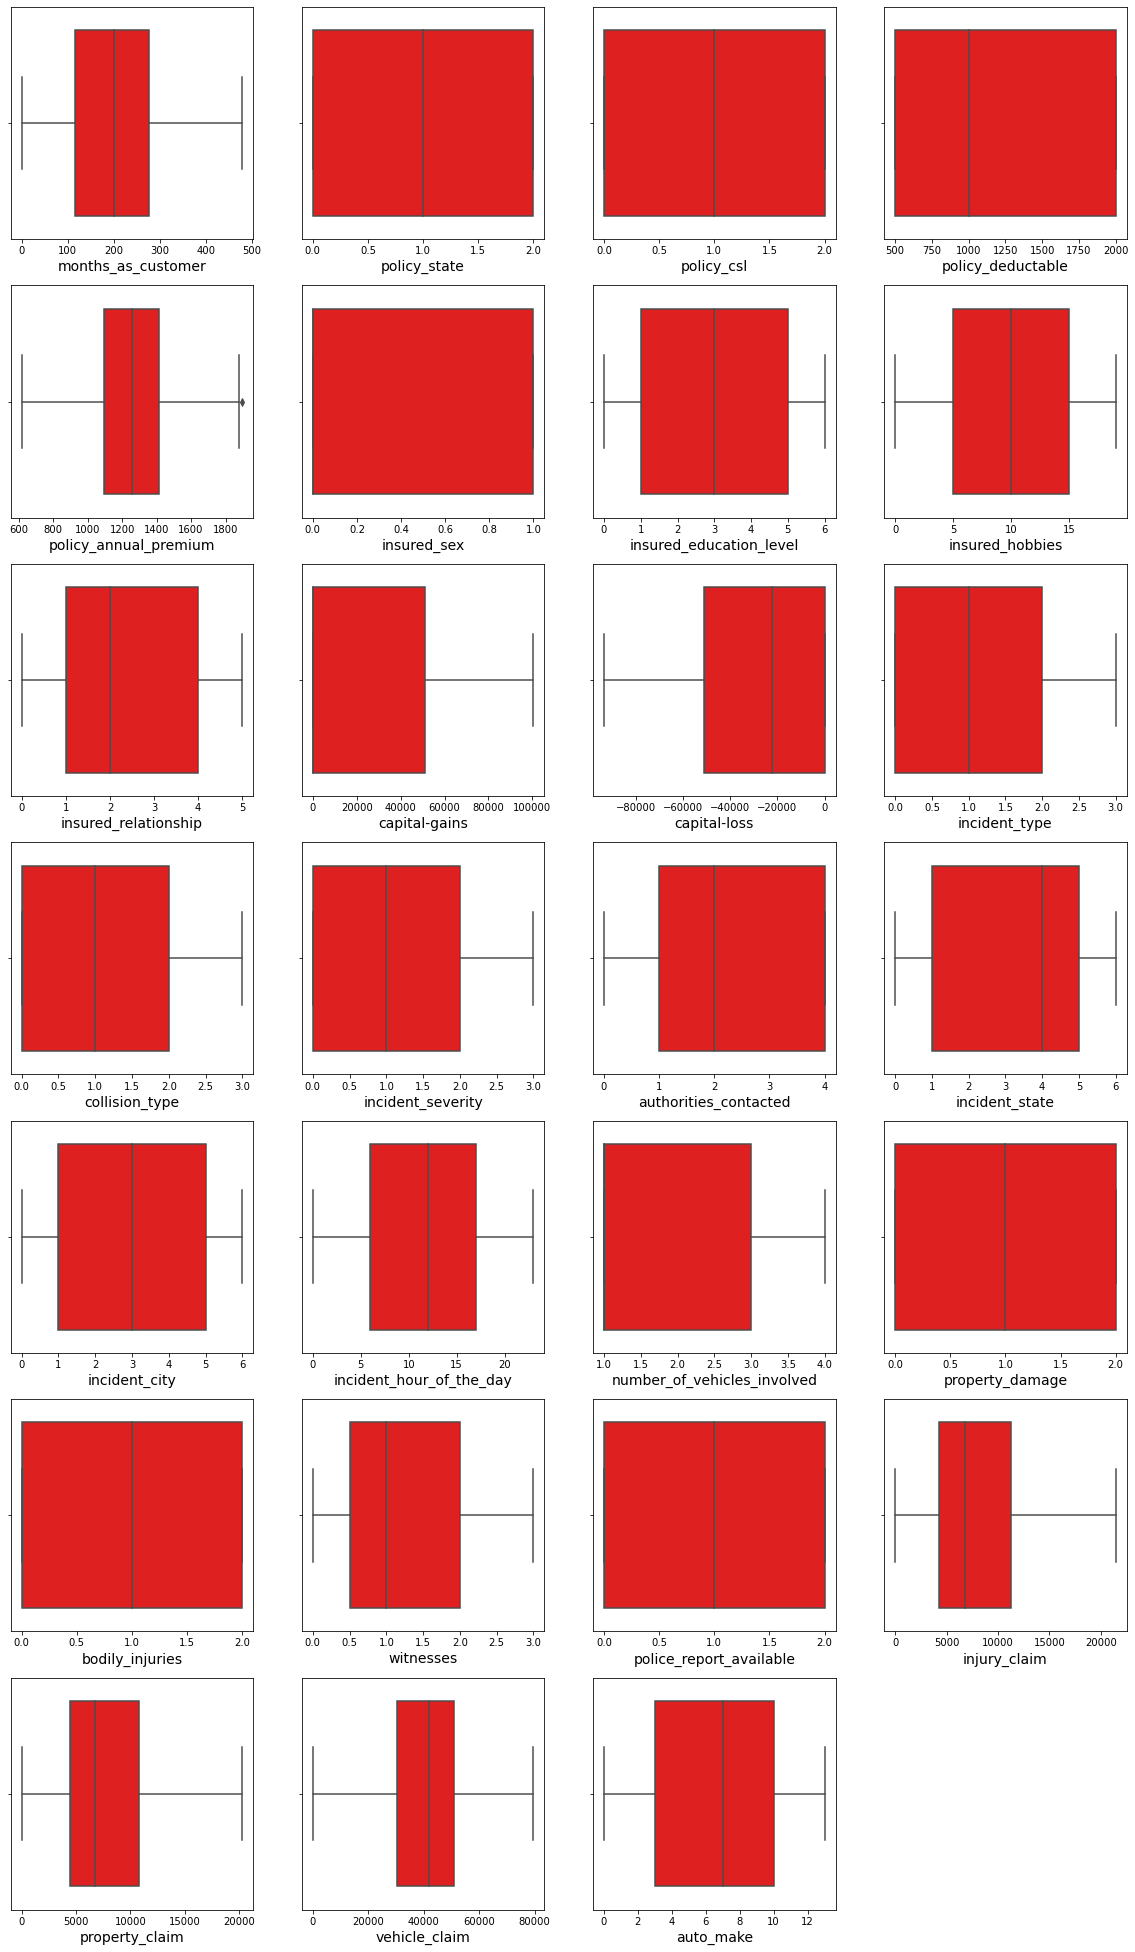

In [80]:
plt.figure(figsize=(20,35),facecolor='white')
plotnum=1
for col in X_new.columns:
    if plotnum<=28:
        plt.subplot(7,4,plotnum)
        sns.boxplot(X_new[col], color='r')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - Outliers have been treated well

# Balancing Target Variable

In [81]:
Y.value_counts()

0    749
1    246
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

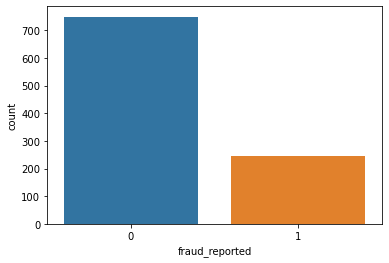

In [82]:
sns.countplot(Y)

In [83]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X,Y = smt.fit_resample(X_new,Y,)
X,Y

(      months_as_customer  policy_state  policy_csl  policy_deductable  \
 0                    328             2           1               1000   
 1                    228             1           1               2000   
 2                    134             2           0               2000   
 3                    256             0           1               2000   
 4                    228             0           2               1000   
 ...                  ...           ...         ...                ...   
 1493                 137             0           1                769   
 1494                  37             1           0               1000   
 1495                 287             0           2               1628   
 1496                 179             2           0               1117   
 1497                 168             0           1               1455   
 
       policy_annual_premium  insured_sex  insured_education_level  \
 0               1406.910000            

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

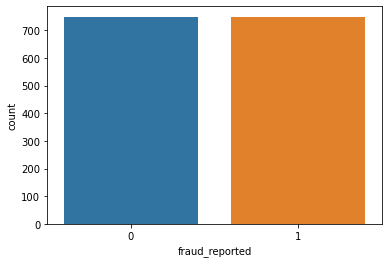

In [84]:
sns.countplot(Y)

In [85]:
X.shape

(1498, 27)

In [86]:
Y.shape

(1498,)

Target data has been balanced using SMOTE

# Transforming data to remove skewness further (Power Transform)

In [87]:
from sklearn.preprocessing import power_transform

X = power_transform(X, method='yeo-johnson')
type(X)

numpy.ndarray

In [88]:
X.mean()

2.6351532998075218e-18

In [89]:
X.std()

1.0

mean = 0 and Standard deviation = 1, our feature variable are normalized now

# Feature Scaling using Standard Scaler

In [90]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X.head()

0         1         2         3         4         5         6   \
0  1.101576  1.274017  0.380965  0.016467  0.731242  1.285040  0.676157   
1  0.315194  0.249784  0.380965  1.327311 -0.212505  1.285040  0.676157   
2 -0.543285  1.274017 -1.171504  1.327311  0.758954 -0.778186  1.603055   
3  0.545571 -1.212669  0.380965  1.327311  0.770515 -0.778186  1.603055   
4  0.315194 -1.212669  1.367796  0.016467  1.511996  1.285040 -1.683846   

         7         8         9   ...        17        18        19        20  \
0  1.310505 -1.597959  1.048542  ... -0.997517 -0.864576  0.205839  0.281972   
1  0.991531 -0.042157 -0.967331  ... -0.499539 -0.864576  1.257810 -1.196672   
2 -1.442699  0.553204  0.978877  ... -0.660994  1.251437 -1.235087  1.286324   
3 -1.442699  1.087016  1.034220  ... -0.997517 -0.864576  1.257810  0.281972   
4 -1.442699  1.087016  1.083963  ...  1.233130 -0.864576 -1.235087 -1.196672   

         21        22        23        24        25        26  
0  0.636336  0.286727 -0.092906  1.104896  0.711225  0.957510  
1 -1.439335  1.269063 -1.683757 -1.742225 -1.940212  0.501315  
2  1.445786 -1.182862  0.150171 -0.769668 -1.040142 -0.519595  
3  0.636336 -1.182862 -0.128890 -0.180889  0.621940 -0.809828  
4 -0.291875 -1.182862 -1.470929 -1.800494 -1.904032 -1.877163  

[5 rows x 27 columns]

# Model Building

As this is a binary classification Problem, I will train the follwoing models -

- A. Logistic Regression
- B. Decision Trees
- C. Random Forests
- D. SVC linear kernel
- E. SGD Classifier
- F. KNN (K_nearest_neighbors)
- G. AdaBoost Classifier
- H. Gradiant Boost Classifier
- I. Bagging Classifier

In [91]:
#importing Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,f1_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

# Finding best Random State

In [92]:
#Choosing the best random state for our ML Model
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    acc_train = accuracy_score(y_train,pred_train)
    acc_test = accuracy_score(y_test,pred_test)
    
    if acc_test > maxAccu:
        maxAccu = acc_test
        maxRS = i
print('test accuracy is :',maxAccu,'at random_state:',maxRS)

test accuracy is : 0.87 at random_state: 95


# Creating the Training and Testing data set

In [93]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=maxRS, test_size=0.20, stratify = Y)

#creating models empty dataframe
models_df = pd.DataFrame()

# Machine Learning Model

In [94]:
def reg_func(model, X, Y, model_name,sc):    
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    
    #classification report
    print('Classification Report :\n',classification_report(y_test,pred))
    
    #confusion matrix
    conf = confusion_matrix(y_test, pred)
    tp = conf[0,0]
    fp = conf[0,1]
    tn = conf[1,1]
    fn = conf[1,0]
    sns.heatmap(conf, annot=True)
    
    #accracy score
    acs = accuracy_score(y_test,pred)
    print('Accuracy :',acs)
    
    #cross validation score
    cvs = cross_val_score(model,X,Y,cv=KFold(n_splits=10, shuffle = True)).mean()
    print('Cross validation score :',cvs)
    
    #difference in accuracy and cross validation score
    diff = abs(acs - cvs)
    print('Accuracy and CV Score Diff :', diff)
    
    #ROC Score
    rocs = roc_auc_score(y_test,pred)
    print("ROC AUC Score :", rocs)
    
    #ROC AUC curve
    fpr,tpr,threshold = roc_curve(y_test, model.predict(x_test))
    plt.figure(figsize=(5,5),facecolor='white')    
    plt.plot(fpr,tpr,label=model_name)
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Receiver Operating Characteristic")
    plt.show()
    
    #appending data to dataframe
    models_df[sc] = [model_name, acs, cvs, diff, tp, fp, fn, tn, rocs,fpr,tpr]
        
    plt.figure(figsize=(5,5))
    plt.scatter(x=y_test, y=pred, color='r')
    plt.plot(y_test,y_test, color='b')
    plt.xlabel('Actual', fontsize = 14)
    plt.ylabel('Predicted', fontsize = 14)
    plt.show()

# A) Logistic Regression

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       150
           1       0.88      0.82      0.85       150

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

Accuracy : 0.8533333333333334
Cross validation score : 0.8050335570469798
Accuracy and CV Score Diff : 0.048299776286353624
ROC AUC Score : 0.8533333333333333


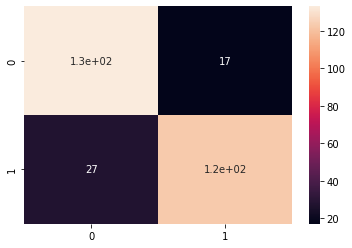

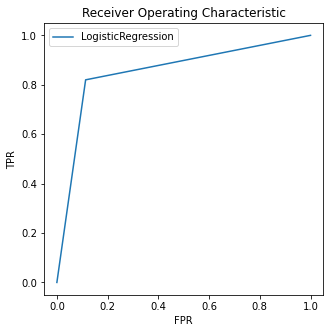

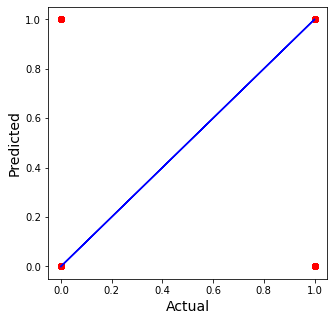

In [95]:
reg_func(LogisticRegression(),X,Y, 'LogisticRegression','lr')

# B) Decision Tree Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       150
           1       0.81      0.78      0.80       150

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

Accuracy : 0.8
Cross validation score : 0.8197673378076062
Accuracy and CV Score Diff : 0.0197673378076062
ROC AUC Score : 0.8000000000000002


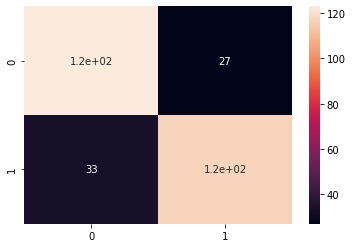

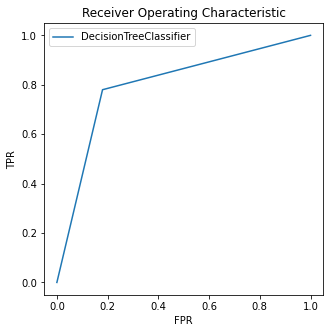

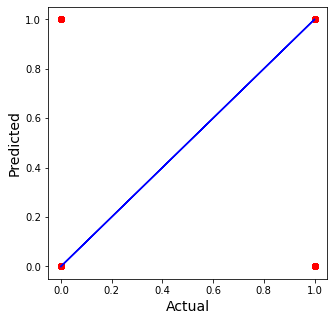

In [96]:
from sklearn.tree import DecisionTreeClassifier
reg_func(DecisionTreeClassifier(), X, Y, 'DecisionTreeClassifier','dtc')

# C) Random Forests Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       150
           1       0.90      0.82      0.86       150

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

Accuracy : 0.8666666666666667
Cross validation score : 0.8624340044742729
Accuracy and CV Score Diff : 0.004232662192393821
ROC AUC Score : 0.8666666666666666


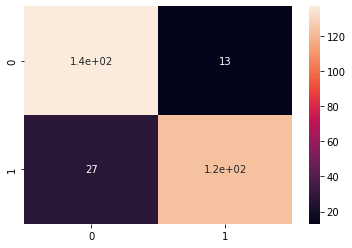

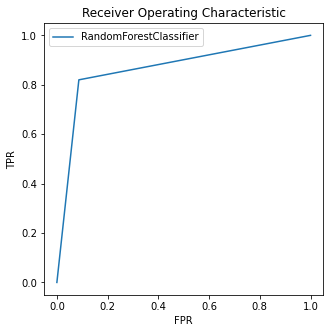

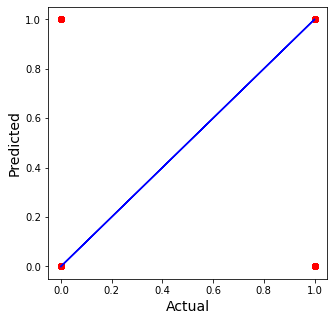

In [97]:
from sklearn.ensemble import RandomForestClassifier
reg_func(RandomForestClassifier(), X, Y,'RandomForestClassifier','rfc')

# D) SVM Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       150
           1       0.90      0.85      0.88       150

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

Accuracy : 0.88
Cross validation score : 0.8611722595078299
Accuracy and CV Score Diff : 0.018827740492170064
ROC AUC Score : 0.88


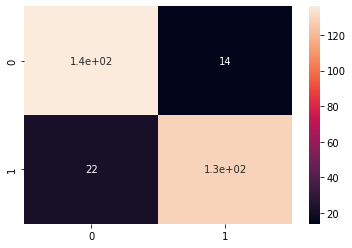

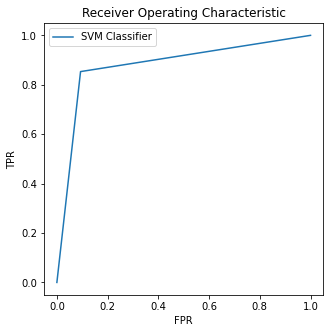

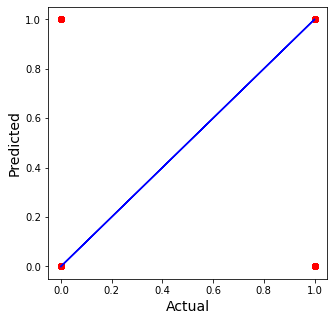

In [98]:
from sklearn.svm import SVC
reg_func(SVC(),X,Y,'SVM Classifier','svmc')

# E) SGD Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.81      0.79       150
           1       0.80      0.75      0.77       150

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300

Accuracy : 0.78
Cross validation score : 0.7530380313199104
Accuracy and CV Score Diff : 0.0269619686800896
ROC AUC Score : 0.78


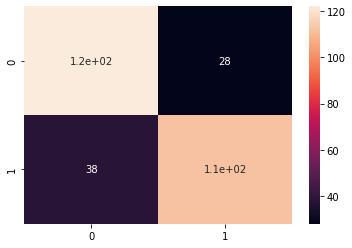

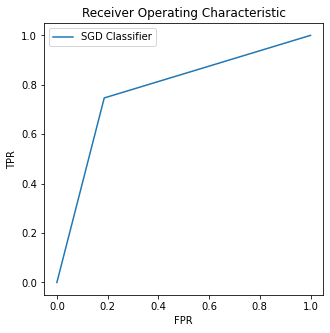

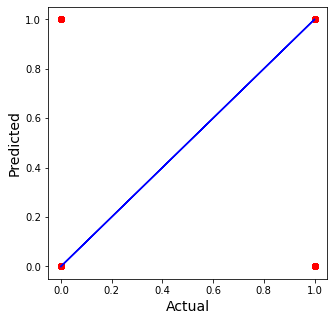

In [99]:
from sklearn.linear_model import SGDClassifier
reg_func(SGDClassifier(),X,Y,'SGD Classifier','sgdc')

# F) KNN (k Nearest Neighbour)

Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.58      0.71       150
           1       0.69      0.95      0.80       150

    accuracy                           0.76       300
   macro avg       0.80      0.76      0.76       300
weighted avg       0.80      0.76      0.76       300

Accuracy : 0.7633333333333333
Cross validation score : 0.7282863534675615
Accuracy and CV Score Diff : 0.035046979865771766
ROC AUC Score : 0.7633333333333334


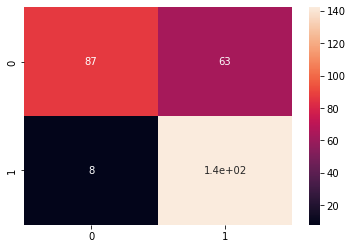

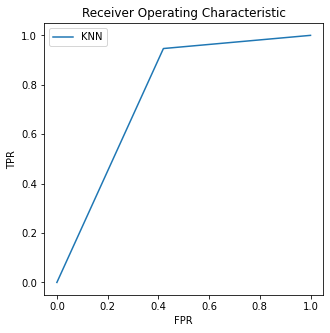

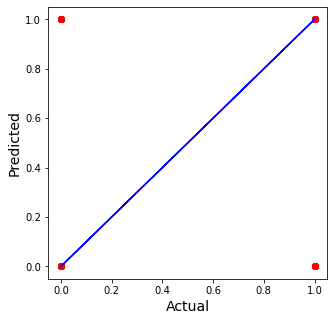

In [100]:
from sklearn.neighbors import KNeighborsClassifier
reg_func(KNeighborsClassifier(),X,Y,'KNN','knn')

# G) ADA Boost Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       150
           1       0.88      0.81      0.84       150

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

Accuracy : 0.85
Cross validation score : 0.8518120805369127
Accuracy and CV Score Diff : 0.0018120805369127302
ROC AUC Score : 0.8500000000000001


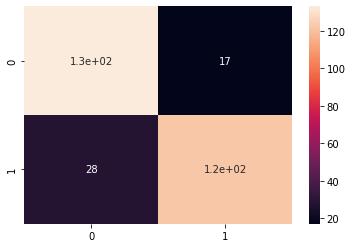

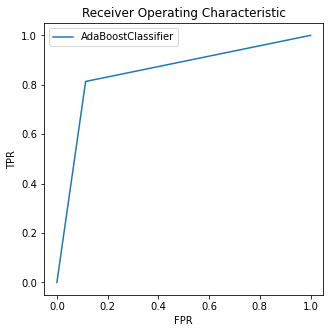

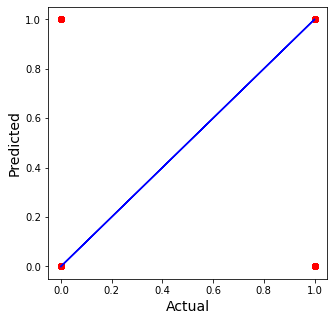

In [101]:
from sklearn.ensemble import AdaBoostClassifier
reg_func(AdaBoostClassifier(), X,Y,'AdaBoostClassifier','abc')

# H) Gradient Boost Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       150
           1       0.88      0.91      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

Accuracy : 0.8933333333333333
Cross validation score : 0.8751633109619685
Accuracy and CV Score Diff : 0.01817002237136478
ROC AUC Score : 0.8933333333333334


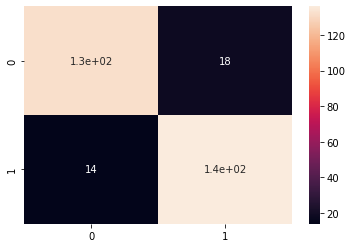

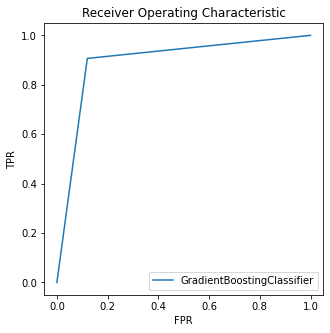

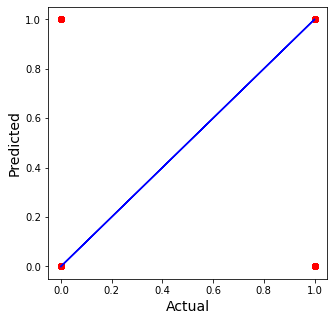

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
reg_func(GradientBoostingClassifier(),X,Y,'GradientBoostingClassifier','gbc')

# I) Bagging Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.90      0.87       150
           1       0.89      0.82      0.85       150

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

Accuracy : 0.86
Cross validation score : 0.8558389261744968
Accuracy and CV Score Diff : 0.0041610738255032365
ROC AUC Score : 0.86


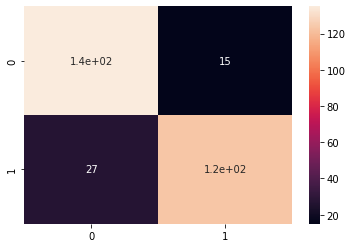

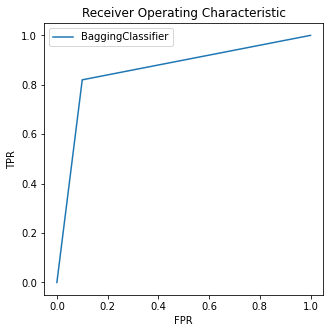

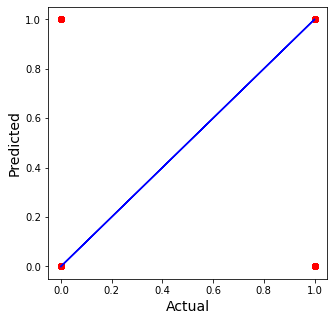

In [104]:
from sklearn.ensemble import BaggingClassifier
reg_func(BaggingClassifier(),X,Y,'BaggingClassifier','bc')

# Analysing Scores

In [105]:
model_stats = models_df.transpose()
model_stats

0         1         2         3    4   5   6   \
lr            LogisticRegression  0.853333  0.805034    0.0483  133  17  27   
dtc       DecisionTreeClassifier       0.8  0.819767  0.019767  123  27  33   
rfc       RandomForestClassifier  0.866667  0.862434  0.004233  137  13  27   
svmc              SVM Classifier      0.88  0.861172  0.018828  136  14  22   
sgdc              SGD Classifier      0.78  0.753038  0.026962  122  28  38   
knn                          KNN  0.763333  0.728286  0.035047   87  63   8   
abc           AdaBoostClassifier      0.85  0.851812  0.001812  133  17  28   
gbc   GradientBoostingClassifier  0.893333  0.875163   0.01817  132  18  14   
bc             BaggingClassifier      0.86  0.855839  0.004161  135  15  27   

       7         8                                9   \
lr    123  0.853333  [0.0, 0.11333333333333333, 1.0]   
dtc   117       0.8                 [0.0, 0.18, 1.0]   
rfc   123  0.866667  [0.0, 0.08666666666666667, 1.0]   
svmc  128      0.88  [0.0, 0.09333333333333334, 1.0]   
sgdc  112      0.78  [0.0, 0.18666666666666668, 1.0]   
knn   142  0.763333                 [0.0, 0.42, 1.0]   
abc   122      0.85  [0.0, 0.11333333333333333, 1.0]   
gbc   136  0.893333                 [0.0, 0.12, 1.0]   
bc    123      0.86                  [0.0, 0.1, 1.0]   

                                  10  
lr                  [0.0, 0.82, 1.0]  
dtc                 [0.0, 0.78, 1.0]  
rfc                 [0.0, 0.82, 1.0]  
svmc  [0.0, 0.8533333333333334, 1.0]  
sgdc  [0.0, 0.7466666666666667, 1.0]  
knn   [0.0, 0.9466666666666667, 1.0]  
abc   [0.0, 0.8133333333333334, 1.0]  
gbc   [0.0, 0.9066666666666666, 1.0]  
bc                  [0.0, 0.82, 1.0]

In [106]:
model_stats.columns = ['Model','Accuracy Score', 'Cross Validation Score', 'Difference','True +ve', 'False +ve', 'False -ve', 'True -ve','ROC Score','FPR','TPR']
model_stats

Model Accuracy Score Cross Validation Score  \
lr            LogisticRegression       0.853333               0.805034   
dtc       DecisionTreeClassifier            0.8               0.819767   
rfc       RandomForestClassifier       0.866667               0.862434   
svmc              SVM Classifier           0.88               0.861172   
sgdc              SGD Classifier           0.78               0.753038   
knn                          KNN       0.763333               0.728286   
abc           AdaBoostClassifier           0.85               0.851812   
gbc   GradientBoostingClassifier       0.893333               0.875163   
bc             BaggingClassifier           0.86               0.855839   

     Difference True +ve False +ve False -ve True -ve ROC Score  \
lr       0.0483      133        17        27      123  0.853333   
dtc    0.019767      123        27        33      117       0.8   
rfc    0.004233      137        13        27      123  0.866667   
svmc   0.018828      136        14        22      128      0.88   
sgdc   0.026962      122        28        38      112      0.78   
knn    0.035047       87        63         8      142  0.763333   
abc    0.001812      133        17        28      122      0.85   
gbc     0.01817      132        18        14      136  0.893333   
bc     0.004161      135        15        27      123      0.86   

                                  FPR                             TPR  
lr    [0.0, 0.11333333333333333, 1.0]                [0.0, 0.82, 1.0]  
dtc                  [0.0, 0.18, 1.0]                [0.0, 0.78, 1.0]  
rfc   [0.0, 0.08666666666666667, 1.0]                [0.0, 0.82, 1.0]  
svmc  [0.0, 0.09333333333333334, 1.0]  [0.0, 0.8533333333333334, 1.0]  
sgdc  [0.0, 0.18666666666666668, 1.0]  [0.0, 0.7466666666666667, 1.0]  
knn                  [0.0, 0.42, 1.0]  [0.0, 0.9466666666666667, 1.0]  
abc   [0.0, 0.11333333333333333, 1.0]  [0.0, 0.8133333333333334, 1.0]  
gbc                  [0.0, 0.12, 1.0]  [0.0, 0.9066666666666666, 1.0]  
bc                    [0.0, 0.1, 1.0]                [0.0, 0.82, 1.0]

# ROC AUC CURVE for all the Model

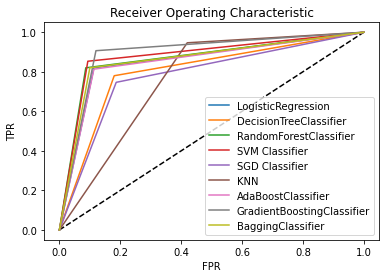

In [107]:
plt.plot([0,1],[0,1], 'k--')
for i in range(0,model_stats.shape[0]):
    plt.plot(model_stats['FPR'][i], model_stats['TPR'][i], label=model_stats['Model'][i])
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic")
plt.show()

# Visualizing Accuracy Score for all Models

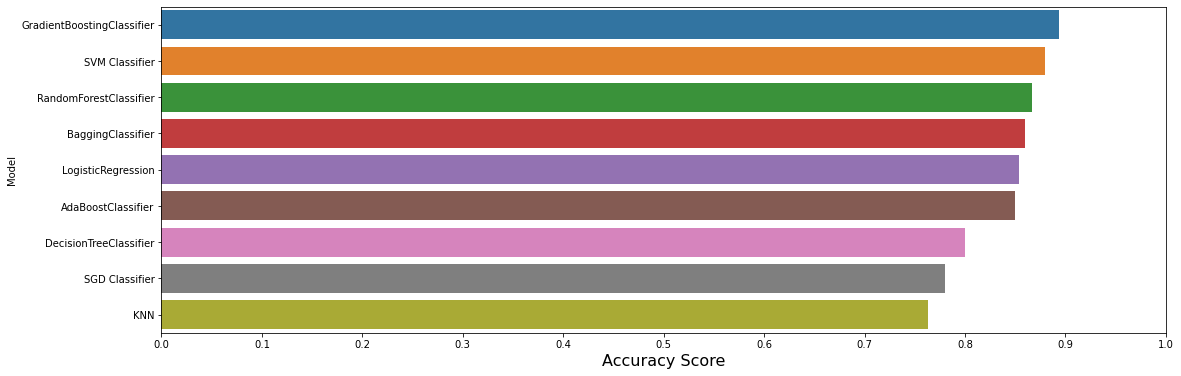

In [108]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)

sns.barplot(x='Accuracy Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Gradient Boost Classifier is giving the highest Accuracy score 89.3%

# Visualizing Cross Validation Score for all Models

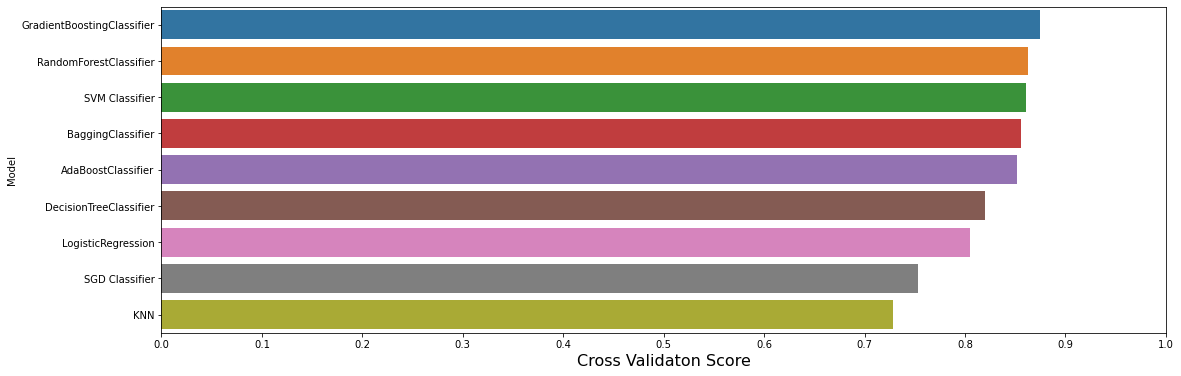

In [110]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Cross Validation Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validation Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Cross Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Gradient Boost Classifier is giving the highest Cross validation Score 87.5%

# Visualizing False Predictions for all Models

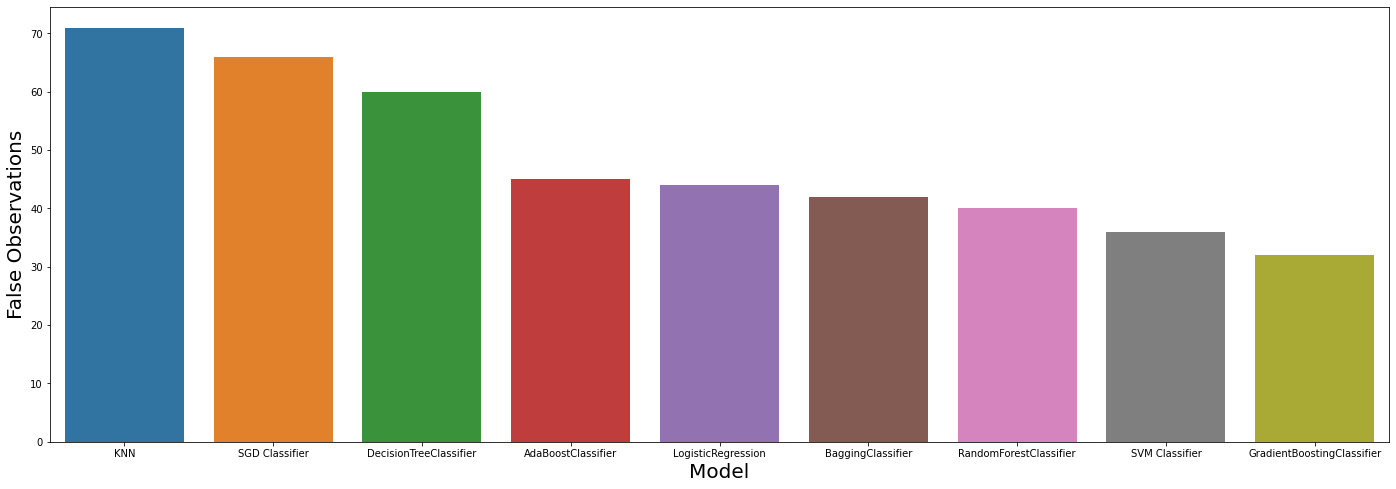

In [111]:
model_stats.sort_values(by=(['Accuracy Score']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = model_stats['Model'], y=model_stats['False +ve'] + model_stats['False -ve'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()

Observation - Gradient Boost Classifier is giving the least false predictions

Hence, Gradient Boost Classifier can be choosen as the best model for this binary classification problem

# Hyper Parameter Tuning with Gradient Boost Classifier

In [113]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['friedman_mse', 'squared_error', 'mse'],"max_depth":[3,4,6,8,10],"loss":['log_loss','deviance','exponential'],'n_estimators':[100,150,200,250,300]}
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=KFold(n_splits=10, shuffle = True),scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'squared_error',
 'loss': 'exponential',
 'max_depth': 6,
 'n_estimators': 300}

Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       150
           1       0.89      0.89      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

Accuracy : 0.8866666666666667
Cross validation score : 0.8878165548098433
Accuracy and CV Score Diff : 0.001149888143176625
ROC AUC Score : 0.8866666666666667


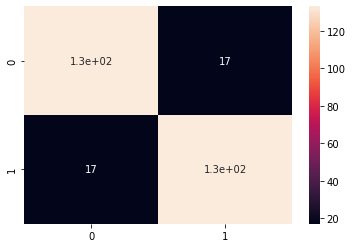

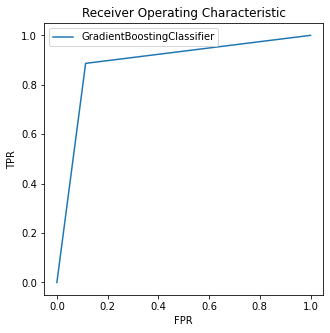

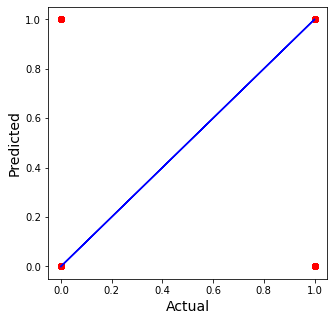

In [114]:
GCV.best_estimator_
gbc = GradientBoostingClassifier(criterion = 'squared_error',loss = 'exponential', max_depth = 6, n_estimators = 300) 
reg_func(gbc, X, Y,'GradientBoostingClassifier','gbc')

# Saving the Model

In [115]:
import pickle
filename = 'insurance_claims_fraud_detection.pkl'
pickle.dump(gbc,open(filename,'wb'))

# Conclusion

In [116]:
loaded_model = pickle.load(open('insurance_claims_fraud_detection.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

88.66666666666667


In [117]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  290  291  \
Predicted    0    1    1    0    0    1    0    0    0    1  ...    1    0   
Original     0    1    1    0    0    0    0    0    0    1  ...    1    0   

           292  293  294  295  296  297  298  299  
Predicted    1    1    0    1    1    0    1    0  
Original     1    1    0    1    1    1    0    0  

[2 rows x 300 columns]

# This model is 88.67% accurate